In [1]:
import pandas as pd
from keras.models import Model
from keras.layers import Dense, Embedding, Input
from keras.layers import LSTM, Bidirectional, GlobalMaxPool1D, GlobalAveragePooling1D, Dropout, Conv1D, concatenate
from keras.preprocessing import text, sequence
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split

/home/vijay/anaconda3/envs/toxic/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/vijay/anaconda3/envs/toxic/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/vijay/anaconda3/envs/toxic/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 88 from C header, got 96 from PyObject
  return f(*args, **kwds)
Using TensorFlow backend.


In [2]:
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")
max_features = 20000
maxlen = 100

In [3]:
list_sentences_train = train["comment_text"].fillna("fillna").values
list_classes = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
y = train[list_classes].values
list_sentences_train, list_sentences_test, y, y_test = train_test_split(list_sentences_train, y, test_size=0.33, random_state=42)

In [4]:
tokenizer = text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(list_sentences_train))
list_tokenized_train = tokenizer.texts_to_sequences(list_sentences_train)
list_tokenized_test = tokenizer.texts_to_sequences(list_sentences_test)
X_t = sequence.pad_sequences(list_tokenized_train, maxlen=maxlen)
X_te = sequence.pad_sequences(list_tokenized_test, maxlen=maxlen)

In [5]:
def blstmcnn_model():
    embed_size = 128
    inp = Input(shape=(maxlen, ))
    x = Embedding(max_features, embed_size)(inp)
    x = Bidirectional(LSTM(50, return_sequences=True))(x)
    x = Conv1D(25, kernel_size = 3, padding = "valid", kernel_initializer = "glorot_uniform")(x)
    avg_pool = GlobalAveragePooling1D()(x)
    max_pool = GlobalMaxPool1D()(x)
    x = concatenate([avg_pool, max_pool])
    x = Dropout(0.1)(x)
    x = Dense(50, activation="relu")(x)
    x = Dropout(0.1)(x)
    x = Dense(6, activation="sigmoid")(x)
    model = Model(inputs=inp, outputs=x)
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    return model

def blstm_model():
  embed_size = 128
  inp = Input(shape=(maxlen, ))
  x = Embedding(max_features, embed_size)(inp)
  x = Bidirectional(LSTM(50, return_sequences=True))(x)
  x = GlobalMaxPool1D()(x)
  x = Dropout(0.1)(x)
  x = Dense(50, activation="relu")(x)
  x = Dropout(0.1)(x)
  x = Dense(6, activation="sigmoid")(x)
  model = Model(inputs=inp, outputs=x)
  model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

  return model

In [6]:
file_path="weights_base.best.hdf5"
checkpoint = ModelCheckpoint(file_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

early = EarlyStopping(monitor="val_loss", mode="min", patience=20)


callbacks_list = [checkpoint, early] #early

In [7]:
blstmcnnmodel = blstmcnn_model()
batch_size = 32
blstmcnnhistory = blstmcnnmodel.fit(X_t, y, batch_size=batch_size, epochs=10, validation_split=0.1, callbacks=callbacks_list)

Train on 96220 samples, validate on 10692 samples
Epoch 1/10
96220/96220 [==============================] - 301s 3ms/step - loss: 0.0671 - acc: 0.9780 - val_loss: 0.0531 - val_acc: 0.9806

Epoch 00001: val_loss improved from inf to 0.05306, saving model to weights_base.best.hdf5
Epoch 2/10
96220/96220 [==============================] - 288s 3ms/step - loss: 0.0460 - acc: 0.9830 - val_loss: 0.0538 - val_acc: 0.9808

Epoch 00002: val_loss did not improve from 0.05306
Epoch 3/10
96220/96220 [==============================] - 278s 3ms/step - loss: 0.0391 - acc: 0.9851 - val_loss: 0.0532 - val_acc: 0.9809

Epoch 00003: val_loss did not improve from 0.05306
Epoch 4/10
96220/96220 [==============================] - 277s 3ms/step - loss: 0.0325 - acc: 0.9872 - val_loss: 0.0596 - val_acc: 0.9810

Epoch 00004: val_loss did not improve from 0.05306
Epoch 5/10
96220/96220 [==============================] - 276s 3ms/step - loss: 0.0275 - acc: 0.9891 - val_loss: 0.0630 - val_acc: 0.9800

Epoch 00005

In [8]:
blstmmodel = blstm_model()
batch_size = 32
blstmhistory = blstmmodel.fit(X_t, y, batch_size=batch_size, epochs=10, validation_split=0.1, callbacks=callbacks_list)

Train on 96220 samples, validate on 10692 samples
Epoch 1/10
96220/96220 [==============================] - 330s 3ms/step - loss: 0.0676 - acc: 0.9784 - val_loss: 0.0530 - val_acc: 0.9806

Epoch 00001: val_loss improved from 0.05306 to 0.05304, saving model to weights_base.best.hdf5
Epoch 2/10
96220/96220 [==============================] - 353s 4ms/step - loss: 0.0460 - acc: 0.9831 - val_loss: 0.0517 - val_acc: 0.9807

Epoch 00002: val_loss improved from 0.05304 to 0.05168, saving model to weights_base.best.hdf5
Epoch 3/10
96220/96220 [==============================] - 324s 3ms/step - loss: 0.0396 - acc: 0.9849 - val_loss: 0.0519 - val_acc: 0.9810

Epoch 00003: val_loss did not improve from 0.05168
Epoch 4/10
96220/96220 [==============================] - 282s 3ms/step - loss: 0.0337 - acc: 0.9869 - val_loss: 0.0577 - val_acc: 0.9812

Epoch 00004: val_loss did not improve from 0.05168
Epoch 5/10
96220/96220 [==============================] - 308s 3ms/step - loss: 0.0288 - acc: 0.9886 -

In [9]:
from keras import backend as K
from keras.engine.topology import Layer
from keras import initializers, regularizers, constraints


class Attention(Layer):
    def __init__(self, step_dim,
                 W_regularizer=None, b_regularizer=None,
                 W_constraint=None, b_constraint=None,
                 bias=True, **kwargs):
        self.supports_masking = True
        self.init = initializers.get('glorot_uniform')

        self.W_regularizer = regularizers.get(W_regularizer)
        self.b_regularizer = regularizers.get(b_regularizer)

        self.W_constraint = constraints.get(W_constraint)
        self.b_constraint = constraints.get(b_constraint)

        self.bias = bias
        self.step_dim = step_dim
        self.features_dim = 0
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        assert len(input_shape) == 3

        self.W = self.add_weight((input_shape[-1],),
                                 initializer=self.init,
                                 name='{}_W'.format(self.name),
                                 regularizer=self.W_regularizer,
                                 constraint=self.W_constraint)
        self.features_dim = input_shape[-1]

        if self.bias:
            self.b = self.add_weight((input_shape[1],),
                                     initializer='zero',
                                     name='{}_b'.format(self.name),
                                     regularizer=self.b_regularizer,
                                     constraint=self.b_constraint)
        else:
            self.b = None

        self.built = True

    def compute_mask(self, input, input_mask=None):
        return None

    def call(self, x, mask=None):
        features_dim = self.features_dim
        step_dim = self.step_dim

        eij = K.reshape(K.dot(K.reshape(x, (-1, features_dim)),
                        K.reshape(self.W, (features_dim, 1))), (-1, step_dim))

        if self.bias:
            eij += self.b

        eij = K.tanh(eij)

        a = K.exp(eij)

        if mask is not None:
            a *= K.cast(mask, K.floatx())

        a /= K.cast(K.sum(a, axis=1, keepdims=True) + K.epsilon(), K.floatx())

        a = K.expand_dims(a)
        weighted_input = x * a
        return K.sum(weighted_input, axis=1)

    def compute_output_shape(self, input_shape):
        return input_shape[0],  self.features_dim
      
def get_blstmattention_model():
  embed_size = 128
  inp = Input(shape=(maxlen, ))
  x = Embedding(max_features, embed_size)(inp)
  x = Bidirectional(LSTM(50, return_sequences=True))(x)
  x = Attention(maxlen)(x)
  x = Dense(50, activation="relu")(x)
  x = Dropout(0.1)(x)
  x = Dense(50, activation="relu")(x)
  x = Dropout(0.1)(x)
  x = Dense(6, activation="sigmoid")(x)
  model = Model(inputs=inp, outputs=x)
  model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

  return model

blstmattentionmodel = get_blstmattention_model()
blstmattentionhistory = blstmattentionmodel.fit(X_t, y, batch_size=32, epochs=10, validation_split=0.1, callbacks=callbacks_list)

Train on 96220 samples, validate on 10692 samples
Epoch 1/10
96220/96220 [==============================] - 295s 3ms/step - loss: 0.0662 - acc: 0.9787 - val_loss: 0.0534 - val_acc: 0.9805

Epoch 00001: val_loss did not improve from 0.05168
Epoch 2/10
96220/96220 [==============================] - 292s 3ms/step - loss: 0.0464 - acc: 0.9830 - val_loss: 0.0525 - val_acc: 0.9803

Epoch 00002: val_loss did not improve from 0.05168
Epoch 3/10
96220/96220 [==============================] - 293s 3ms/step - loss: 0.0403 - acc: 0.9847 - val_loss: 0.0539 - val_acc: 0.9804

Epoch 00003: val_loss did not improve from 0.05168
Epoch 4/10
96220/96220 [==============================] - 318s 3ms/step - loss: 0.0345 - acc: 0.9865 - val_loss: 0.0618 - val_acc: 0.9808

Epoch 00004: val_loss did not improve from 0.05168
Epoch 5/10
96220/96220 [==============================] - 313s 3ms/step - loss: 0.0297 - acc: 0.9882 - val_loss: 0.0626 - val_acc: 0.9800

Epoch 00005: val_loss did not improve from 0.05168


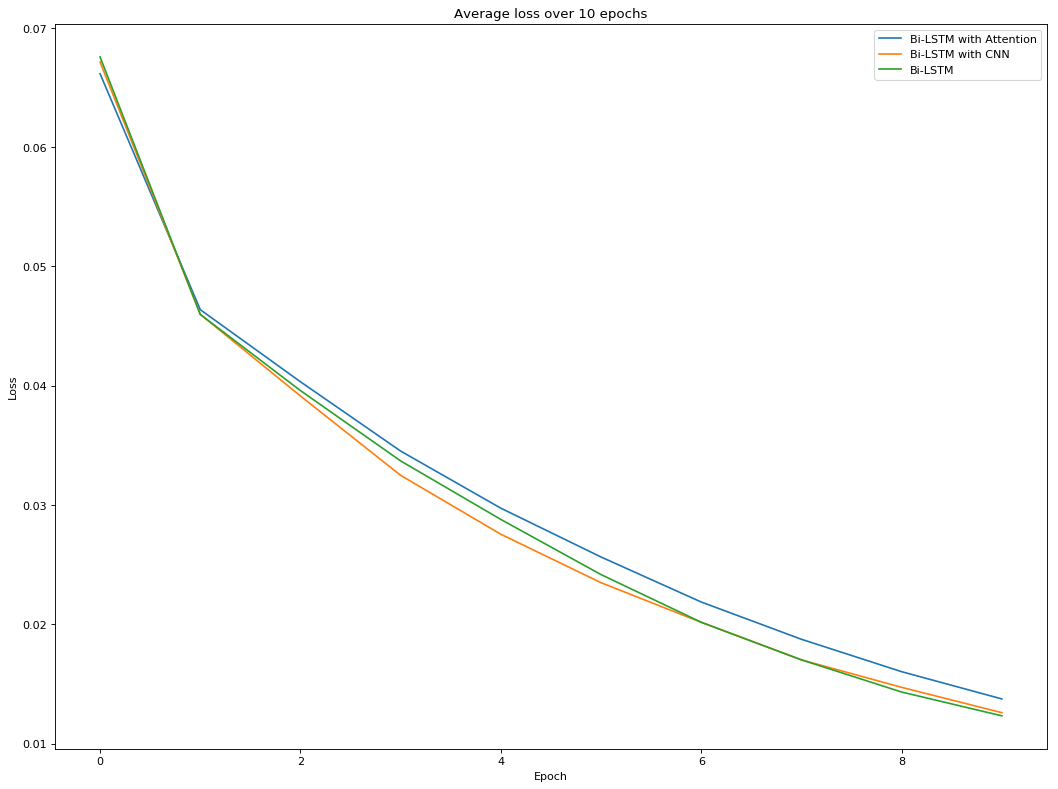

In [16]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')
plt.plot(blstmattentionhistory.history["loss"])
plt.plot(blstmcnnhistory.history["loss"])
plt.plot(blstmhistory.history["loss"])
plt.title("Average loss over 10 epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Bi-LSTM with Attention", "Bi-LSTM with CNN", "Bi-LSTM"])
plt.savefig("./bothloss.png")

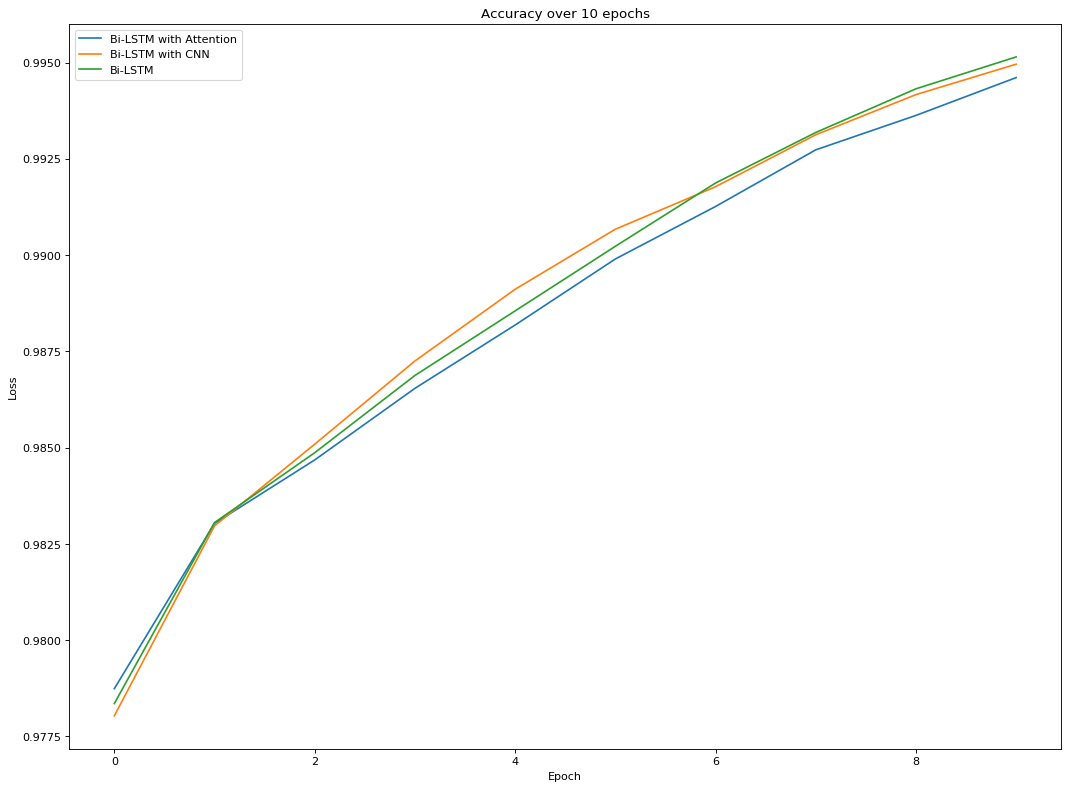

In [28]:
figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')
plt.plot(blstmattentionhistory.history["acc"])
plt.plot(blstmcnnhistory.history["acc"])
plt.plot(blstmhistory.history["acc"])
plt.title("Accuracy over 10 epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Bi-LSTM with Attention", "Bi-LSTM with CNN", "Bi-LSTM"])
plt.savefig("./bothacc.png")

In [63]:
cnn_pred = blstmcnnmodel.predict(X_te)
bi_pred = blstmmodel.predict(X_te)
attn_pred = blstmattentionmodel.predict(X_te)

AttributeError: 'Model' object has no attribute 'predict_classes'

In [60]:
sample_submission = pd.DataFrame(columns=["comment"] + list_classes)
sample_submission["comment"] = list_sentences_test
sample_submission[list_classes] = cnn_pred
sample_submission.to_csv("./baseline.csv", index=False)


In [25]:
from sklearn.metrics import roc_auc_score
print("Bi-LSTM ROCAUC ", roc_auc_score(y_test, bi_pred))
print("Bi-LSTM CNN ROCAUC ", roc_auc_score(y_test, cnn_pred))
print("Bi-LSTM ATTN ROCAUC ", roc_auc_score(y_test, attn_pred))


Bi-LSTM ROCAUC  0.9633929778175604
Bi-LSTM CNN ROCAUC  0.9593181686143288
Bi-LSTM ATTN ROCAUC  0.9554597700838868


In [41]:
import numpy as np
inpstring = ["nigga"]
inpstringtokens = tokenizer.texts_to_sequences(inpstring)
inpstringseq = sequence.pad_sequences(inpstringtokens, maxlen=maxlen)
np.argmax(blstmcnnmodel.predict(inpstringseq))

0

In [67]:
for i in range(len(cnn_pred)):
    print(i, np.argmax(cnn_pred[i], axis=0), y_test[i])

0 0 [0 0 0 0 0 0]
1 0 [0 0 0 0 0 0]
2 0 [0 0 0 0 0 0]
3 0 [0 0 0 0 0 0]
4 0 [0 0 0 0 0 0]
5 2 [0 0 0 0 0 0]
6 0 [0 0 0 0 0 0]
7 0 [0 0 0 0 0 0]
8 2 [0 0 0 0 0 0]
9 0 [0 0 0 0 0 0]
10 4 [0 0 0 0 0 0]
11 2 [0 0 0 0 0 0]
12 0 [0 0 0 0 0 0]
13 2 [0 0 0 0 0 0]
14 0 [0 0 0 0 0 0]
15 0 [0 0 0 0 0 0]
16 0 [0 0 0 0 0 0]
17 2 [0 0 0 0 0 0]
18 4 [0 0 0 0 0 0]
19 0 [0 0 0 0 0 0]
20 0 [0 0 0 0 0 0]
21 5 [1 0 0 0 0 1]
22 0 [0 0 0 0 0 0]
23 0 [0 0 0 0 0 0]
24 0 [0 0 0 0 0 0]
25 0 [0 0 0 0 0 0]
26 0 [1 0 1 0 1 0]
27 0 [0 0 0 0 0 0]
28 0 [0 0 0 0 0 0]
29 0 [0 0 0 0 0 0]
30 0 [0 0 0 0 0 0]
31 0 [0 0 0 0 0 0]
32 0 [0 0 0 0 0 0]
33 2 [0 0 0 0 0 0]
34 2 [0 0 0 0 0 0]
35 2 [0 0 0 0 0 0]
36 0 [1 1 1 0 1 0]
37 0 [0 0 0 0 0 0]
38 0 [1 0 0 0 0 0]
39 0 [1 0 1 0 1 0]
40 0 [1 0 0 0 1 0]
41 0 [0 0 0 0 0 0]
42 2 [0 0 0 0 0 0]
43 0 [0 0 0 0 0 0]
44 0 [0 0 0 0 0 0]
45 0 [0 0 0 0 0 0]
46 0 [0 0 0 0 0 0]
47 2 [0 0 0 0 0 0]
48 2 [0 0 0 0 0 0]
49 0 [0 0 0 0 0 0]
50 0 [0 0 0 0 0 0]
51 0 [0 0 0 0 0 0]
52 4 [0 0 0 0 0 0]
53 

927 0 [0 0 0 0 0 0]
928 2 [0 0 0 0 0 0]
929 0 [0 0 0 0 0 0]
930 2 [0 0 0 0 0 0]
931 0 [0 0 0 0 0 0]
932 0 [0 0 0 0 0 0]
933 2 [0 0 0 0 0 0]
934 0 [0 0 0 0 0 0]
935 0 [0 0 0 0 0 0]
936 0 [0 0 0 0 0 0]
937 0 [0 0 0 0 0 0]
938 2 [0 0 0 0 0 0]
939 0 [0 0 0 0 0 0]
940 0 [0 0 0 0 0 0]
941 2 [0 0 0 0 0 0]
942 0 [0 0 0 0 0 0]
943 0 [0 0 0 0 0 0]
944 0 [0 0 0 0 0 0]
945 0 [0 0 0 0 0 0]
946 2 [0 0 0 0 0 0]
947 0 [0 0 0 0 0 0]
948 0 [1 0 0 0 0 0]
949 0 [0 0 0 0 0 0]
950 0 [0 0 0 0 0 0]
951 2 [0 0 0 0 0 0]
952 0 [0 0 0 0 0 0]
953 0 [0 0 0 0 0 0]
954 2 [0 0 0 0 0 0]
955 0 [0 0 0 0 0 0]
956 0 [1 0 0 0 0 0]
957 0 [0 0 0 0 0 0]
958 0 [0 0 0 0 0 0]
959 0 [0 0 0 0 0 0]
960 2 [0 0 0 0 0 0]
961 2 [0 0 0 0 0 0]
962 0 [0 0 0 0 0 0]
963 0 [0 0 0 0 0 0]
964 0 [0 0 0 0 0 0]
965 0 [0 0 0 0 0 0]
966 0 [1 0 1 0 1 0]
967 0 [0 0 0 0 0 0]
968 0 [1 0 0 0 0 0]
969 0 [0 0 0 0 0 0]
970 0 [0 0 0 0 0 0]
971 0 [0 0 0 0 0 0]
972 0 [0 0 0 0 0 0]
973 0 [0 0 0 0 0 0]
974 0 [0 0 0 0 0 0]
975 0 [0 0 0 0 0 0]
976 0 [0 0 0 0 0 0]


1926 2 [0 0 0 0 0 0]
1927 2 [0 0 0 0 0 0]
1928 0 [0 0 0 0 0 0]
1929 0 [0 0 0 0 0 0]
1930 2 [0 0 0 0 0 0]
1931 4 [0 0 0 0 0 0]
1932 0 [0 0 0 0 0 0]
1933 0 [0 0 0 0 0 0]
1934 0 [0 0 0 0 0 0]
1935 0 [0 0 0 0 0 0]
1936 0 [0 0 0 0 0 0]
1937 0 [1 0 0 0 1 0]
1938 0 [0 0 0 0 0 0]
1939 0 [0 0 0 0 0 0]
1940 0 [1 0 1 0 1 0]
1941 0 [0 0 0 0 0 0]
1942 0 [0 0 0 0 0 0]
1943 2 [0 0 0 0 0 0]
1944 0 [1 0 1 0 1 0]
1945 0 [0 0 0 0 0 0]
1946 0 [0 0 0 0 0 0]
1947 0 [0 0 0 0 0 0]
1948 0 [0 0 0 0 0 0]
1949 4 [0 0 0 0 0 0]
1950 0 [0 0 0 0 0 0]
1951 0 [0 0 0 0 0 0]
1952 0 [0 0 0 0 0 0]
1953 0 [0 0 0 0 0 0]
1954 0 [0 0 0 0 0 0]
1955 0 [0 0 0 0 0 0]
1956 0 [0 0 0 0 0 0]
1957 0 [0 0 0 0 0 0]
1958 0 [0 0 0 0 0 0]
1959 0 [0 0 0 0 0 0]
1960 0 [0 0 0 0 0 0]
1961 2 [0 0 0 0 0 0]
1962 0 [0 0 0 0 0 0]
1963 0 [0 0 0 0 0 0]
1964 0 [0 0 0 0 0 0]
1965 0 [0 0 0 0 0 0]
1966 2 [0 0 0 0 0 0]
1967 0 [0 0 0 0 0 0]
1968 0 [0 0 0 0 0 0]
1969 0 [1 0 0 0 0 0]
1970 2 [0 0 0 0 0 0]
1971 0 [0 0 0 0 0 0]
1972 0 [0 0 0 0 0 0]
1973 0 [0 0 0

2926 0 [0 0 0 0 0 0]
2927 0 [1 0 1 0 1 0]
2928 2 [0 0 0 0 0 0]
2929 0 [0 0 0 0 0 0]
2930 0 [0 0 0 0 0 0]
2931 0 [0 0 0 0 0 0]
2932 0 [0 0 0 0 0 0]
2933 2 [0 0 0 0 0 0]
2934 0 [0 0 0 0 0 0]
2935 0 [1 0 0 0 1 0]
2936 0 [0 0 0 0 0 0]
2937 0 [1 0 0 0 0 0]
2938 0 [0 0 0 0 0 0]
2939 0 [0 0 0 0 0 0]
2940 0 [0 0 0 0 0 0]
2941 2 [0 0 0 0 0 0]
2942 0 [0 0 0 0 0 0]
2943 2 [0 0 0 0 0 0]
2944 0 [0 0 0 0 0 0]
2945 0 [0 0 0 0 0 0]
2946 0 [1 0 0 0 1 0]
2947 0 [0 0 0 0 0 0]
2948 0 [0 0 0 0 0 0]
2949 0 [0 0 0 0 0 0]
2950 0 [0 0 0 0 0 0]
2951 0 [0 0 0 0 0 0]
2952 0 [0 0 0 0 0 0]
2953 0 [0 0 0 0 0 0]
2954 2 [0 0 0 0 0 0]
2955 0 [0 0 0 0 0 0]
2956 0 [0 0 0 0 0 0]
2957 5 [0 0 0 0 0 0]
2958 0 [1 0 0 0 0 0]
2959 0 [0 0 0 0 0 0]
2960 0 [0 0 0 0 0 0]
2961 0 [0 0 1 0 0 0]
2962 2 [1 0 1 0 0 0]
2963 0 [0 0 0 0 0 0]
2964 0 [0 0 0 0 0 0]
2965 0 [1 0 1 0 0 0]
2966 0 [0 0 0 0 0 0]
2967 0 [0 0 0 0 0 0]
2968 2 [0 0 0 0 0 0]
2969 0 [0 0 0 0 0 0]
2970 0 [0 0 0 0 0 0]
2971 2 [0 0 0 0 0 0]
2972 2 [0 0 0 0 0 0]
2973 0 [0 0 0

3926 2 [0 0 0 0 0 0]
3927 2 [0 0 0 0 0 0]
3928 0 [0 0 0 0 0 0]
3929 2 [0 0 0 0 0 0]
3930 0 [0 0 0 0 0 0]
3931 0 [0 0 0 0 0 0]
3932 0 [1 0 1 0 1 0]
3933 0 [0 0 0 0 0 0]
3934 0 [0 0 0 0 0 0]
3935 0 [0 0 0 0 0 0]
3936 0 [0 0 0 0 0 0]
3937 0 [0 0 0 0 0 0]
3938 0 [0 0 0 0 0 0]
3939 0 [0 0 0 0 0 0]
3940 0 [0 0 0 0 0 0]
3941 2 [0 0 0 0 0 0]
3942 0 [0 0 0 0 0 0]
3943 0 [0 0 0 0 0 0]
3944 0 [0 0 0 0 0 0]
3945 0 [0 0 0 0 0 0]
3946 0 [0 0 0 0 0 0]
3947 0 [1 0 0 0 0 0]
3948 0 [0 0 0 0 0 0]
3949 0 [0 0 0 0 0 0]
3950 0 [0 0 0 0 0 0]
3951 2 [0 0 0 0 0 0]
3952 2 [0 0 0 0 0 0]
3953 2 [0 0 0 0 0 0]
3954 0 [0 0 0 0 0 0]
3955 2 [0 0 0 0 0 0]
3956 0 [1 0 1 0 0 0]
3957 2 [0 0 0 0 0 0]
3958 0 [0 0 0 0 0 0]
3959 0 [0 0 0 0 0 0]
3960 0 [0 0 0 0 0 0]
3961 0 [0 0 0 0 0 0]
3962 0 [0 0 0 0 0 0]
3963 0 [0 0 0 0 0 0]
3964 0 [0 0 0 0 0 0]
3965 0 [1 0 0 0 0 0]
3966 0 [0 0 0 0 0 0]
3967 0 [0 0 0 0 0 0]
3968 2 [0 0 0 0 0 0]
3969 0 [0 0 0 0 0 0]
3970 0 [0 0 0 0 0 0]
3971 0 [0 0 0 0 0 0]
3972 0 [0 0 0 0 0 0]
3973 0 [0 0 0

4904 0 [0 0 0 0 0 0]
4905 0 [0 0 0 0 0 0]
4906 0 [0 0 0 0 0 0]
4907 2 [0 0 0 0 0 0]
4908 0 [0 0 0 0 0 0]
4909 0 [0 0 0 0 0 0]
4910 2 [0 0 0 0 0 0]
4911 0 [0 0 0 0 0 0]
4912 0 [0 0 0 0 0 0]
4913 0 [1 0 0 0 1 0]
4914 0 [1 0 0 0 0 0]
4915 0 [0 0 0 0 0 0]
4916 0 [1 0 0 0 1 0]
4917 0 [0 0 0 0 0 0]
4918 0 [0 0 0 0 0 0]
4919 0 [0 0 0 0 0 0]
4920 0 [1 0 1 0 1 0]
4921 0 [0 0 0 0 0 0]
4922 2 [0 0 0 0 0 0]
4923 0 [0 0 0 0 0 0]
4924 0 [0 0 0 0 0 0]
4925 0 [0 0 0 0 0 0]
4926 0 [0 0 0 0 0 0]
4927 0 [0 0 0 0 0 0]
4928 2 [0 0 0 0 0 0]
4929 2 [0 0 0 0 0 0]
4930 0 [0 0 0 0 0 0]
4931 0 [0 0 0 0 0 0]
4932 0 [0 0 0 0 0 0]
4933 0 [0 0 0 0 0 0]
4934 0 [0 0 0 0 0 0]
4935 0 [0 0 0 0 0 0]
4936 0 [0 0 0 0 0 0]
4937 0 [0 0 0 0 0 0]
4938 0 [0 0 0 0 0 0]
4939 0 [0 0 0 0 0 0]
4940 2 [0 0 0 0 0 0]
4941 0 [0 0 0 0 0 0]
4942 0 [0 0 0 0 0 0]
4943 0 [0 0 0 0 0 0]
4944 2 [0 0 0 0 0 0]
4945 0 [0 0 0 0 0 0]
4946 0 [0 0 0 0 0 0]
4947 0 [0 0 0 0 0 0]
4948 0 [0 0 0 0 0 0]
4949 0 [0 0 0 0 0 0]
4950 0 [0 0 0 0 0 0]
4951 2 [0 0 0

5758 0 [0 0 0 0 0 0]
5759 0 [0 0 0 0 0 0]
5760 2 [0 0 0 0 0 0]
5761 0 [0 0 0 0 0 0]
5762 0 [0 0 0 0 0 0]
5763 2 [0 0 0 0 0 0]
5764 0 [0 0 0 0 0 0]
5765 2 [0 0 0 0 0 0]
5766 0 [0 0 0 0 0 0]
5767 0 [0 0 0 0 0 0]
5768 0 [0 0 0 0 0 0]
5769 0 [0 0 0 0 0 0]
5770 0 [0 0 0 0 0 0]
5771 5 [1 0 0 0 1 1]
5772 2 [0 0 0 0 0 0]
5773 0 [0 0 0 0 0 0]
5774 0 [0 0 0 0 0 0]
5775 0 [0 0 0 0 0 0]
5776 0 [0 0 0 0 0 0]
5777 0 [1 0 1 0 1 0]
5778 0 [0 0 0 0 0 0]
5779 0 [0 0 0 0 0 0]
5780 2 [0 0 0 0 0 0]
5781 0 [0 0 0 0 0 0]
5782 4 [0 0 0 0 0 0]
5783 0 [0 0 1 0 1 0]
5784 0 [0 0 0 0 0 0]
5785 0 [1 0 1 0 1 0]
5786 0 [0 0 0 0 0 0]
5787 0 [0 0 0 0 0 0]
5788 0 [0 0 0 0 0 0]
5789 0 [0 0 0 0 0 0]
5790 0 [1 1 0 0 1 0]
5791 0 [0 0 0 0 0 0]
5792 0 [0 0 0 0 0 0]
5793 0 [0 0 0 0 0 0]
5794 0 [0 0 0 0 0 0]
5795 0 [1 0 0 0 0 0]
5796 0 [0 0 0 0 0 0]
5797 0 [0 0 0 0 0 0]
5798 2 [0 0 0 0 0 0]
5799 0 [0 0 0 0 0 0]
5800 0 [0 0 0 0 0 0]
5801 4 [0 0 0 0 0 0]
5802 0 [0 0 0 0 0 0]
5803 0 [0 0 0 0 0 0]
5804 0 [0 0 0 0 0 0]
5805 0 [0 0 0

6758 0 [0 0 0 0 0 0]
6759 0 [0 0 0 0 0 0]
6760 0 [0 0 0 0 0 0]
6761 4 [0 0 0 0 0 0]
6762 2 [0 0 0 0 0 0]
6763 4 [0 0 0 0 0 0]
6764 0 [0 0 0 0 0 0]
6765 0 [0 0 0 0 0 0]
6766 2 [0 0 0 0 0 0]
6767 0 [0 0 0 0 0 0]
6768 2 [0 0 0 0 0 0]
6769 0 [1 0 1 0 1 0]
6770 0 [0 0 0 0 0 0]
6771 0 [0 0 0 0 0 0]
6772 0 [0 0 0 0 0 0]
6773 0 [0 0 0 0 0 0]
6774 2 [0 0 0 0 0 0]
6775 0 [0 0 0 0 0 0]
6776 0 [0 0 0 0 0 0]
6777 0 [0 0 0 0 0 0]
6778 2 [0 0 0 0 0 0]
6779 0 [0 0 0 0 0 0]
6780 0 [0 0 0 0 0 0]
6781 4 [0 0 0 0 0 0]
6782 0 [0 0 0 0 0 0]
6783 0 [0 0 0 0 0 0]
6784 0 [0 0 0 0 0 0]
6785 0 [0 0 0 0 0 0]
6786 0 [0 0 0 0 0 0]
6787 0 [0 0 0 0 0 0]
6788 0 [0 0 0 0 0 0]
6789 0 [0 0 0 0 0 0]
6790 0 [0 0 0 0 0 0]
6791 0 [0 0 0 0 0 0]
6792 0 [0 0 0 0 0 0]
6793 0 [0 0 0 0 0 0]
6794 0 [0 0 0 0 0 0]
6795 4 [0 0 0 0 0 0]
6796 2 [0 0 0 0 0 0]
6797 2 [0 0 0 0 0 0]
6798 2 [0 0 0 0 0 0]
6799 0 [0 0 0 0 0 0]
6800 5 [0 0 0 0 0 0]
6801 2 [0 0 0 0 0 0]
6802 2 [0 0 0 0 0 0]
6803 0 [0 0 0 0 0 0]
6804 0 [0 0 0 0 0 0]
6805 0 [0 0 0

7758 2 [0 0 0 0 0 0]
7759 2 [0 0 0 0 0 0]
7760 0 [0 0 0 0 0 0]
7761 0 [0 0 0 0 0 0]
7762 0 [0 0 0 0 0 0]
7763 0 [0 0 0 0 0 0]
7764 0 [0 0 0 0 0 0]
7765 2 [0 0 0 0 0 0]
7766 0 [0 0 0 0 0 0]
7767 0 [0 0 0 0 0 0]
7768 0 [0 0 0 0 0 0]
7769 0 [0 0 0 0 1 0]
7770 2 [0 0 0 0 0 0]
7771 0 [1 0 1 0 1 0]
7772 0 [0 0 0 0 0 0]
7773 0 [0 0 0 0 0 0]
7774 0 [0 0 0 0 0 0]
7775 4 [0 0 0 0 0 0]
7776 0 [0 0 0 0 0 0]
7777 0 [0 0 0 0 0 0]
7778 0 [0 0 0 0 0 0]
7779 0 [0 0 0 0 0 0]
7780 0 [0 0 0 0 0 0]
7781 0 [0 0 0 0 0 0]
7782 0 [0 0 0 0 0 0]
7783 0 [0 0 0 0 0 0]
7784 0 [0 0 0 0 0 0]
7785 2 [0 0 0 0 0 0]
7786 0 [0 0 0 0 0 0]
7787 2 [0 0 0 0 0 0]
7788 0 [0 0 0 0 0 0]
7789 0 [0 0 0 0 0 0]
7790 0 [0 0 0 0 0 0]
7791 0 [0 0 0 0 0 0]
7792 0 [0 0 0 0 0 0]
7793 0 [0 0 0 0 0 0]
7794 2 [0 0 0 0 0 0]
7795 0 [0 0 0 0 0 0]
7796 0 [0 0 0 0 0 0]
7797 2 [0 0 0 0 0 0]
7798 0 [0 0 0 0 0 0]
7799 0 [1 0 1 0 1 1]
7800 0 [0 0 0 0 0 0]
7801 2 [0 0 0 0 0 0]
7802 0 [0 0 0 0 0 0]
7803 0 [0 0 0 0 0 0]
7804 0 [1 0 1 0 1 0]
7805 0 [0 0 0

8653 0 [0 0 0 0 0 0]
8654 0 [0 0 0 0 0 0]
8655 4 [0 0 0 0 0 0]
8656 0 [0 0 0 0 0 0]
8657 0 [0 0 0 0 0 0]
8658 0 [0 0 0 0 0 0]
8659 0 [0 0 0 0 0 0]
8660 0 [1 0 0 0 0 0]
8661 0 [0 0 0 0 0 0]
8662 2 [0 0 0 0 0 0]
8663 2 [0 0 0 0 0 0]
8664 0 [0 0 0 0 0 0]
8665 0 [0 0 0 0 0 0]
8666 0 [1 1 1 0 0 0]
8667 0 [0 0 0 0 0 0]
8668 0 [0 0 0 0 0 0]
8669 0 [0 0 0 0 0 0]
8670 0 [0 0 0 0 0 0]
8671 0 [0 0 0 0 0 0]
8672 0 [0 0 0 0 0 0]
8673 0 [0 0 0 0 0 0]
8674 0 [0 0 0 0 0 0]
8675 2 [0 0 0 0 0 0]
8676 0 [0 0 0 0 0 0]
8677 0 [0 0 0 0 0 0]
8678 0 [0 0 0 0 0 0]
8679 0 [0 0 0 0 0 0]
8680 0 [0 0 0 0 0 0]
8681 2 [0 0 0 0 0 0]
8682 0 [0 0 0 0 0 0]
8683 0 [0 0 0 0 0 0]
8684 2 [0 0 0 0 0 0]
8685 0 [0 0 0 0 0 0]
8686 0 [0 0 0 0 0 0]
8687 0 [0 0 0 0 0 0]
8688 2 [0 0 0 0 0 0]
8689 0 [0 0 0 0 0 0]
8690 0 [0 0 0 0 0 0]
8691 2 [0 0 0 0 0 0]
8692 0 [0 0 0 0 0 0]
8693 0 [0 0 0 0 0 0]
8694 0 [0 0 0 0 0 0]
8695 0 [0 0 0 0 0 0]
8696 0 [0 0 0 0 0 0]
8697 0 [1 0 0 0 0 0]
8698 0 [0 0 0 0 0 0]
8699 0 [0 0 0 0 0 0]
8700 4 [0 0 0

9590 0 [0 0 0 0 0 0]
9591 0 [0 0 0 0 0 0]
9592 4 [1 0 1 0 1 0]
9593 0 [1 0 1 0 0 0]
9594 0 [0 0 0 0 0 0]
9595 2 [0 0 0 0 0 0]
9596 4 [0 0 0 0 0 0]
9597 0 [0 0 0 0 0 0]
9598 0 [0 0 0 0 0 0]
9599 2 [0 0 0 0 0 0]
9600 0 [0 0 0 0 0 0]
9601 0 [0 0 0 0 0 0]
9602 0 [0 0 0 0 0 0]
9603 0 [0 0 0 0 0 0]
9604 0 [0 0 0 0 0 0]
9605 0 [0 0 0 0 0 0]
9606 0 [0 0 0 0 0 0]
9607 0 [0 0 0 0 0 0]
9608 2 [0 0 0 0 0 0]
9609 0 [0 0 0 0 0 0]
9610 2 [0 0 0 0 0 0]
9611 0 [1 0 1 0 1 1]
9612 0 [0 0 0 0 0 0]
9613 0 [0 0 0 0 0 0]
9614 2 [0 0 0 0 0 0]
9615 0 [0 0 0 0 0 0]
9616 4 [0 0 0 0 0 0]
9617 0 [0 0 0 0 0 0]
9618 0 [1 0 1 0 1 0]
9619 0 [0 0 0 0 0 0]
9620 0 [0 0 0 0 0 0]
9621 0 [0 0 0 0 0 0]
9622 0 [0 0 0 0 0 0]
9623 0 [0 0 0 0 0 0]
9624 0 [0 0 0 0 0 0]
9625 0 [0 0 0 0 0 0]
9626 2 [0 0 0 0 0 0]
9627 0 [0 0 0 0 0 0]
9628 5 [0 0 0 0 0 0]
9629 2 [0 0 0 0 0 0]
9630 0 [0 0 0 0 0 0]
9631 0 [0 0 0 0 0 0]
9632 2 [0 0 0 0 0 0]
9633 0 [0 0 0 0 0 0]
9634 0 [1 0 0 0 0 0]
9635 0 [0 0 0 0 0 0]
9636 0 [0 0 0 0 0 0]
9637 0 [0 0 0

10590 2 [0 0 0 0 0 0]
10591 0 [0 0 0 0 0 0]
10592 0 [0 0 0 0 0 0]
10593 2 [0 0 0 0 0 0]
10594 2 [1 0 0 0 0 0]
10595 0 [0 0 0 0 0 0]
10596 0 [0 0 0 0 0 0]
10597 2 [0 0 0 0 0 0]
10598 0 [0 0 0 0 0 0]
10599 0 [0 0 0 0 0 0]
10600 0 [0 0 0 0 0 0]
10601 0 [0 0 0 0 0 0]
10602 0 [0 0 0 0 0 0]
10603 2 [0 0 0 0 0 0]
10604 0 [0 0 0 0 0 0]
10605 0 [0 0 0 0 0 0]
10606 0 [0 0 0 0 0 0]
10607 2 [0 0 0 0 0 0]
10608 0 [0 0 0 0 0 0]
10609 0 [0 0 0 0 0 0]
10610 0 [0 0 0 0 0 0]
10611 0 [0 0 0 0 0 0]
10612 2 [0 0 0 0 0 0]
10613 0 [0 0 0 0 0 0]
10614 4 [0 0 0 0 0 0]
10615 0 [0 0 0 0 0 0]
10616 0 [0 0 0 0 0 0]
10617 4 [0 0 0 0 0 0]
10618 0 [0 0 0 0 0 0]
10619 0 [0 0 0 0 0 0]
10620 0 [0 0 0 0 0 0]
10621 4 [0 0 0 0 0 0]
10622 2 [0 0 0 0 0 0]
10623 0 [0 0 0 0 0 0]
10624 0 [0 0 0 0 0 0]
10625 2 [0 0 0 0 0 0]
10626 0 [0 0 0 0 0 0]
10627 0 [0 0 0 0 0 0]
10628 2 [0 0 0 0 0 0]
10629 2 [0 0 0 0 0 0]
10630 0 [1 0 0 0 0 0]
10631 0 [0 0 0 0 0 0]
10632 2 [0 0 0 0 0 0]
10633 0 [1 0 0 0 0 0]
10634 0 [0 0 0 0 0 0]
10635 0 [0

11590 0 [0 0 0 0 0 0]
11591 2 [0 0 0 0 0 0]
11592 0 [0 0 0 0 0 0]
11593 2 [0 0 0 0 0 0]
11594 0 [0 0 0 0 0 0]
11595 2 [0 0 0 0 0 0]
11596 0 [0 0 0 0 0 0]
11597 0 [1 0 1 0 1 0]
11598 0 [0 0 0 0 0 0]
11599 0 [0 0 0 0 0 0]
11600 0 [0 0 0 0 0 0]
11601 0 [0 0 0 0 0 0]
11602 0 [0 0 0 0 0 0]
11603 0 [0 0 0 0 0 0]
11604 2 [0 0 0 0 0 0]
11605 0 [0 0 0 0 0 0]
11606 0 [0 0 0 0 0 0]
11607 0 [0 0 0 0 0 0]
11608 0 [0 0 0 0 0 0]
11609 0 [1 1 1 0 1 0]
11610 0 [1 0 1 0 1 0]
11611 0 [0 0 0 0 0 0]
11612 2 [0 0 0 0 0 0]
11613 0 [0 0 0 0 0 0]
11614 2 [0 0 0 0 0 0]
11615 0 [0 0 0 0 0 0]
11616 0 [0 0 0 0 0 0]
11617 0 [0 0 0 0 0 0]
11618 0 [0 0 0 0 0 0]
11619 0 [1 1 1 0 1 1]
11620 0 [0 0 0 0 0 0]
11621 2 [0 0 0 0 0 0]
11622 0 [0 0 0 0 0 0]
11623 0 [0 0 0 0 0 0]
11624 4 [0 0 0 0 0 0]
11625 2 [0 0 0 0 0 0]
11626 0 [0 0 0 0 0 0]
11627 0 [0 0 0 0 0 0]
11628 0 [0 0 0 0 0 0]
11629 0 [0 0 0 0 0 0]
11630 0 [0 0 0 0 0 0]
11631 4 [0 0 0 0 0 0]
11632 0 [0 0 0 0 0 0]
11633 0 [0 0 0 0 0 0]
11634 0 [0 0 0 0 0 0]
11635 0 [0

12589 0 [0 0 0 0 0 0]
12590 0 [0 0 0 0 0 0]
12591 0 [0 0 0 0 0 0]
12592 0 [0 0 0 0 0 0]
12593 2 [0 0 0 0 0 0]
12594 2 [0 0 0 0 0 0]
12595 0 [0 0 0 0 0 0]
12596 0 [0 0 0 0 0 0]
12597 0 [0 0 0 0 0 0]
12598 0 [0 0 0 0 0 0]
12599 2 [0 0 0 0 0 0]
12600 0 [0 0 0 0 0 0]
12601 2 [0 0 0 0 0 0]
12602 0 [0 0 0 0 0 0]
12603 0 [0 0 0 0 0 0]
12604 2 [0 0 0 0 0 0]
12605 2 [0 0 0 0 0 0]
12606 0 [0 0 0 0 0 0]
12607 0 [0 0 0 0 0 0]
12608 0 [0 0 0 0 0 0]
12609 0 [0 0 0 0 0 0]
12610 0 [0 0 0 0 0 0]
12611 2 [0 0 0 0 0 0]
12612 0 [0 0 0 0 0 0]
12613 0 [0 0 0 0 0 0]
12614 0 [0 0 0 0 0 0]
12615 0 [0 0 0 0 0 0]
12616 0 [0 0 0 0 0 0]
12617 2 [0 0 0 0 0 0]
12618 0 [1 0 1 0 1 0]
12619 0 [0 0 0 0 0 0]
12620 2 [0 0 0 0 0 0]
12621 0 [0 0 0 0 0 0]
12622 0 [0 0 0 0 0 0]
12623 0 [0 0 0 0 0 0]
12624 4 [0 0 0 0 0 0]
12625 0 [0 0 0 0 0 0]
12626 2 [0 0 0 0 0 0]
12627 2 [0 0 0 0 0 0]
12628 0 [1 1 1 0 1 0]
12629 0 [0 0 0 0 0 0]
12630 2 [0 0 0 0 0 0]
12631 2 [0 0 0 0 0 0]
12632 0 [0 0 0 0 0 0]
12633 0 [0 0 0 0 0 0]
12634 0 [0

13589 0 [0 0 0 0 0 0]
13590 0 [0 0 0 0 0 0]
13591 4 [0 0 0 0 0 0]
13592 0 [0 0 0 0 0 0]
13593 0 [0 0 0 0 0 0]
13594 2 [0 0 0 0 0 0]
13595 0 [0 0 0 0 0 0]
13596 0 [0 0 0 0 0 0]
13597 0 [0 0 0 0 0 0]
13598 4 [0 0 0 0 0 0]
13599 2 [0 0 0 0 0 0]
13600 0 [0 0 0 0 0 0]
13601 0 [0 0 0 0 0 0]
13602 0 [0 0 0 0 0 0]
13603 0 [0 0 0 0 0 0]
13604 2 [0 0 0 0 0 0]
13605 0 [0 0 0 0 0 0]
13606 2 [0 0 0 0 0 0]
13607 0 [1 0 0 0 1 0]
13608 4 [0 0 0 0 0 0]
13609 0 [0 0 0 0 0 0]
13610 2 [0 0 0 0 0 0]
13611 0 [0 0 0 0 0 0]
13612 0 [0 0 0 0 0 0]
13613 0 [1 0 1 1 1 0]
13614 2 [0 0 0 0 0 0]
13615 2 [0 0 0 0 0 0]
13616 0 [0 0 0 0 0 0]
13617 0 [0 0 1 0 1 0]
13618 0 [0 0 0 0 0 0]
13619 0 [0 0 0 0 0 0]
13620 0 [0 0 0 0 0 0]
13621 0 [0 0 0 0 0 0]
13622 0 [0 0 0 0 0 0]
13623 0 [0 0 0 0 0 0]
13624 2 [0 0 0 0 0 0]
13625 0 [0 0 0 0 0 0]
13626 2 [0 0 0 0 0 0]
13627 0 [0 0 0 0 0 0]
13628 0 [0 0 0 0 0 0]
13629 2 [0 0 0 0 0 0]
13630 0 [0 0 0 0 0 0]
13631 0 [1 0 1 0 0 0]
13632 0 [0 0 0 0 0 0]
13633 0 [1 0 0 0 0 0]
13634 4 [0

14589 0 [0 0 0 0 0 0]
14590 0 [0 0 0 0 0 0]
14591 0 [0 0 0 0 0 0]
14592 0 [1 0 1 0 0 0]
14593 0 [0 0 0 0 0 0]
14594 0 [0 0 0 0 0 0]
14595 2 [0 0 0 0 0 0]
14596 0 [0 0 0 0 0 0]
14597 0 [0 0 0 0 0 0]
14598 0 [0 0 0 0 0 0]
14599 0 [0 0 0 0 0 0]
14600 0 [0 0 0 0 0 0]
14601 0 [0 0 0 0 0 0]
14602 0 [0 0 0 0 0 0]
14603 0 [0 0 0 0 0 0]
14604 2 [0 0 0 0 0 0]
14605 0 [0 0 0 0 0 0]
14606 0 [0 0 0 0 0 0]
14607 2 [0 0 0 0 0 0]
14608 0 [0 0 0 0 0 0]
14609 0 [1 0 0 0 0 0]
14610 0 [1 0 1 0 1 0]
14611 0 [0 0 0 0 0 0]
14612 0 [0 0 0 0 0 0]
14613 0 [0 0 0 0 0 0]
14614 4 [0 0 0 0 0 0]
14615 0 [0 0 0 0 0 0]
14616 2 [0 0 0 0 0 0]
14617 2 [0 0 0 0 0 0]
14618 0 [0 0 0 0 0 0]
14619 0 [0 0 0 0 0 0]
14620 0 [0 0 0 0 0 0]
14621 2 [0 0 0 0 0 0]
14622 0 [0 0 0 0 0 0]
14623 4 [0 0 0 0 0 0]
14624 2 [0 0 0 0 0 0]
14625 0 [1 0 0 0 1 0]
14626 0 [0 0 0 0 0 0]
14627 0 [0 0 0 0 0 0]
14628 0 [0 0 0 0 0 0]
14629 0 [0 0 0 0 0 0]
14630 2 [0 0 0 0 0 0]
14631 0 [0 0 0 0 0 0]
14632 0 [0 0 0 0 0 0]
14633 0 [0 0 0 0 0 0]
14634 2 [0

15422 0 [0 0 0 0 0 0]
15423 0 [0 0 0 0 0 0]
15424 0 [0 0 0 0 0 0]
15425 0 [0 0 0 0 0 0]
15426 0 [1 0 0 0 0 0]
15427 0 [1 0 0 0 0 0]
15428 0 [0 0 0 0 0 0]
15429 0 [0 0 0 0 0 0]
15430 0 [0 0 0 0 0 0]
15431 0 [0 0 0 0 0 0]
15432 0 [1 0 1 0 1 0]
15433 0 [1 0 1 0 1 1]
15434 0 [0 0 0 0 0 0]
15435 2 [0 0 0 0 0 0]
15436 2 [0 0 0 0 0 0]
15437 0 [0 0 0 0 0 0]
15438 0 [0 0 0 0 0 0]
15439 0 [0 0 0 0 0 0]
15440 0 [0 0 0 0 0 0]
15441 0 [0 0 0 0 0 0]
15442 0 [0 0 0 0 0 0]
15443 0 [0 0 0 0 0 0]
15444 0 [0 0 0 0 0 0]
15445 2 [1 0 0 0 0 0]
15446 0 [0 0 0 0 0 0]
15447 0 [0 0 0 0 0 0]
15448 0 [0 0 0 0 0 0]
15449 0 [0 0 0 0 0 0]
15450 2 [0 0 0 0 0 0]
15451 2 [0 0 0 0 0 0]
15452 0 [0 0 0 0 0 0]
15453 0 [0 0 0 0 0 0]
15454 0 [0 0 0 0 0 0]
15455 0 [0 0 0 0 0 0]
15456 0 [0 0 0 0 0 0]
15457 2 [0 0 0 0 0 0]
15458 0 [0 0 0 0 0 0]
15459 0 [0 0 0 0 0 0]
15460 0 [0 0 0 0 0 0]
15461 0 [0 0 0 0 0 0]
15462 0 [1 0 0 0 0 0]
15463 0 [0 0 0 0 0 0]
15464 0 [0 0 0 0 0 0]
15465 0 [0 0 0 0 0 0]
15466 0 [0 0 0 0 0 0]
15467 0 [0

16421 0 [1 0 1 0 1 0]
16422 0 [0 0 0 0 0 0]
16423 0 [0 0 0 0 0 0]
16424 0 [0 0 0 0 0 0]
16425 2 [0 0 0 0 0 0]
16426 0 [0 0 0 0 0 0]
16427 0 [0 0 0 0 0 0]
16428 4 [1 0 0 0 0 0]
16429 2 [0 0 0 0 0 0]
16430 0 [0 0 0 0 0 0]
16431 0 [0 0 0 0 0 0]
16432 0 [0 0 0 0 0 0]
16433 0 [0 0 0 0 0 0]
16434 2 [0 0 0 0 0 0]
16435 0 [0 0 0 0 0 0]
16436 0 [0 0 0 0 0 0]
16437 0 [0 0 0 0 0 0]
16438 2 [0 0 0 0 0 0]
16439 0 [0 0 0 0 0 0]
16440 0 [0 0 0 0 0 0]
16441 0 [1 0 1 0 1 0]
16442 0 [0 0 0 0 0 0]
16443 0 [0 0 0 0 0 0]
16444 0 [0 0 0 0 0 0]
16445 2 [0 0 0 0 0 0]
16446 0 [0 0 0 0 0 0]
16447 0 [0 0 0 0 0 0]
16448 2 [0 0 0 0 0 0]
16449 0 [0 0 0 0 0 0]
16450 0 [0 0 0 0 0 0]
16451 0 [0 0 0 0 0 0]
16452 0 [0 0 0 0 0 0]
16453 0 [0 0 0 0 0 0]
16454 0 [0 0 0 0 0 0]
16455 0 [1 0 1 0 1 0]
16456 0 [0 0 0 0 0 0]
16457 0 [0 0 0 0 0 0]
16458 0 [1 0 1 0 1 0]
16459 0 [0 0 0 0 0 0]
16460 0 [1 0 1 0 1 0]
16461 0 [0 0 0 0 0 0]
16462 2 [0 0 0 0 0 0]
16463 0 [0 0 0 0 0 0]
16464 0 [0 0 0 0 0 0]
16465 0 [0 0 0 0 0 0]
16466 0 [1

17421 0 [0 0 0 0 0 0]
17422 0 [0 0 0 0 0 0]
17423 0 [0 0 0 0 0 0]
17424 5 [1 0 0 0 0 0]
17425 0 [0 0 0 0 0 0]
17426 0 [0 0 0 0 0 0]
17427 0 [0 0 0 0 0 0]
17428 0 [0 0 0 0 0 0]
17429 0 [0 0 0 0 0 0]
17430 0 [0 0 0 0 0 0]
17431 0 [0 0 0 0 0 0]
17432 0 [1 0 0 0 0 0]
17433 0 [0 0 0 0 0 0]
17434 2 [0 0 0 0 0 0]
17435 2 [0 0 0 0 0 0]
17436 0 [0 0 0 0 0 0]
17437 0 [0 0 0 0 0 0]
17438 2 [0 0 0 0 0 0]
17439 0 [1 0 0 0 1 0]
17440 0 [1 0 0 0 1 0]
17441 2 [1 0 0 0 0 0]
17442 0 [0 0 0 0 0 0]
17443 0 [0 0 0 0 0 0]
17444 0 [0 0 0 0 0 0]
17445 0 [0 0 0 0 0 0]
17446 2 [0 0 0 0 0 0]
17447 0 [0 0 0 0 0 0]
17448 2 [0 0 0 0 0 0]
17449 0 [0 0 0 0 0 0]
17450 2 [0 0 0 0 0 0]
17451 0 [0 0 0 0 0 0]
17452 0 [0 0 0 0 0 0]
17453 0 [0 0 0 0 0 0]
17454 0 [0 0 0 0 0 0]
17455 2 [0 0 0 0 0 0]
17456 2 [0 0 0 0 0 0]
17457 0 [0 0 0 0 0 0]
17458 0 [0 0 0 0 0 0]
17459 0 [0 0 0 0 0 0]
17460 0 [0 0 0 0 0 0]
17461 2 [0 0 0 0 0 0]
17462 2 [0 0 0 0 0 0]
17463 0 [0 0 0 0 0 0]
17464 0 [0 0 0 0 0 0]
17465 0 [0 0 0 0 0 0]
17466 0 [0

18421 4 [0 0 0 0 0 0]
18422 0 [0 0 0 0 0 0]
18423 2 [0 0 0 0 0 0]
18424 0 [0 0 0 0 0 0]
18425 0 [0 0 0 0 0 0]
18426 2 [0 0 0 0 0 0]
18427 0 [0 0 0 0 0 0]
18428 0 [0 0 0 0 0 0]
18429 2 [0 0 0 0 0 0]
18430 0 [0 0 0 0 0 0]
18431 0 [0 0 0 0 0 0]
18432 0 [1 0 1 0 0 0]
18433 0 [0 0 0 0 0 0]
18434 0 [0 0 0 0 0 0]
18435 0 [0 0 0 0 0 0]
18436 0 [0 0 0 0 0 0]
18437 0 [0 0 0 0 0 0]
18438 0 [0 0 0 0 0 0]
18439 0 [0 0 0 0 0 0]
18440 0 [0 0 0 0 0 0]
18441 0 [0 0 0 0 0 0]
18442 0 [0 0 0 0 0 0]
18443 0 [0 0 0 0 0 0]
18444 2 [0 0 0 0 0 0]
18445 4 [0 0 0 0 0 0]
18446 0 [0 0 0 0 0 0]
18447 0 [1 0 0 0 0 0]
18448 2 [0 0 0 0 0 0]
18449 0 [0 0 0 0 0 0]
18450 0 [0 0 0 0 0 0]
18451 0 [0 0 0 0 0 0]
18452 0 [0 0 0 0 0 0]
18453 0 [0 0 0 0 0 0]
18454 0 [0 0 0 0 0 0]
18455 2 [0 0 0 0 0 0]
18456 0 [0 0 0 0 0 0]
18457 0 [0 0 0 0 0 0]
18458 0 [0 0 0 0 0 0]
18459 0 [0 0 0 0 0 0]
18460 0 [0 0 0 0 0 0]
18461 0 [1 1 1 0 1 0]
18462 0 [0 0 0 0 0 0]
18463 0 [0 0 0 0 0 0]
18464 0 [1 0 0 0 1 0]
18465 0 [0 0 0 0 0 0]
18466 0 [0

19402 0 [1 0 0 0 1 0]
19403 0 [0 0 0 0 0 0]
19404 0 [0 0 0 0 0 0]
19405 0 [0 0 0 0 0 0]
19406 0 [0 0 0 0 0 0]
19407 2 [0 0 0 0 0 0]
19408 0 [1 0 1 0 0 0]
19409 0 [0 0 0 0 0 0]
19410 0 [0 0 0 0 0 0]
19411 2 [0 0 0 0 0 0]
19412 0 [0 0 0 0 0 0]
19413 0 [0 0 0 0 0 0]
19414 2 [0 0 0 0 0 0]
19415 0 [0 0 0 0 0 0]
19416 0 [1 0 0 0 0 0]
19417 0 [0 0 0 0 0 0]
19418 0 [0 0 0 0 0 0]
19419 0 [1 0 1 0 1 0]
19420 0 [0 0 0 0 0 0]
19421 0 [0 0 0 0 0 0]
19422 0 [0 0 0 0 0 0]
19423 0 [0 0 0 0 0 0]
19424 0 [0 0 0 0 0 0]
19425 0 [0 0 0 0 0 0]
19426 0 [0 0 0 0 0 0]
19427 0 [0 0 0 0 0 0]
19428 0 [0 0 0 0 0 0]
19429 0 [0 0 0 0 0 0]
19430 0 [0 0 0 0 0 0]
19431 0 [1 0 1 0 1 0]
19432 4 [0 0 0 0 0 0]
19433 0 [0 0 0 0 0 0]
19434 0 [0 0 0 0 0 0]
19435 0 [0 0 0 0 0 0]
19436 0 [0 0 0 0 0 0]
19437 2 [0 0 0 0 0 0]
19438 0 [0 0 0 0 0 0]
19439 2 [0 0 0 0 0 0]
19440 0 [0 0 0 0 0 0]
19441 0 [0 0 0 0 0 0]
19442 0 [0 0 0 0 0 0]
19443 0 [0 0 0 0 0 0]
19444 0 [0 0 0 0 0 0]
19445 0 [0 0 0 0 0 0]
19446 0 [0 0 0 0 0 0]
19447 0 [0

20253 0 [0 0 0 0 0 0]
20254 0 [0 0 0 0 0 0]
20255 0 [0 0 0 0 0 0]
20256 0 [0 0 0 0 0 0]
20257 0 [0 0 0 0 0 0]
20258 0 [1 0 1 0 1 0]
20259 0 [1 0 1 0 1 0]
20260 4 [1 0 0 0 0 0]
20261 0 [0 0 0 0 0 0]
20262 0 [0 0 0 0 0 0]
20263 0 [0 0 0 0 0 0]
20264 0 [0 0 0 0 0 0]
20265 0 [0 0 0 0 0 0]
20266 2 [0 0 0 0 0 0]
20267 2 [0 0 0 0 0 0]
20268 2 [0 0 0 0 0 0]
20269 0 [0 0 0 0 0 0]
20270 4 [0 0 0 0 0 0]
20271 0 [0 0 0 0 0 0]
20272 0 [1 1 1 0 1 0]
20273 2 [0 0 0 0 0 0]
20274 0 [0 0 0 0 0 0]
20275 0 [0 0 0 0 0 0]
20276 2 [0 0 0 0 0 0]
20277 0 [0 0 0 0 0 0]
20278 0 [1 0 0 0 0 0]
20279 0 [0 0 0 0 0 0]
20280 0 [0 0 0 0 0 0]
20281 5 [0 0 0 0 0 0]
20282 0 [0 0 0 0 0 0]
20283 0 [1 0 0 0 0 0]
20284 0 [0 0 0 0 0 0]
20285 0 [0 0 0 0 0 0]
20286 0 [0 0 0 0 0 0]
20287 0 [0 0 0 0 0 0]
20288 0 [0 0 0 0 0 0]
20289 0 [0 0 0 0 0 0]
20290 2 [0 0 0 0 0 0]
20291 0 [1 0 0 1 0 0]
20292 0 [0 0 0 0 0 0]
20293 0 [0 0 0 0 0 0]
20294 0 [0 0 0 0 0 0]
20295 0 [0 0 0 0 0 0]
20296 0 [0 0 0 0 0 0]
20297 0 [0 0 0 0 0 0]
20298 0 [0

21253 0 [0 0 0 0 0 0]
21254 0 [0 0 0 0 0 0]
21255 0 [0 0 0 0 0 0]
21256 0 [1 0 1 0 1 0]
21257 0 [0 0 0 0 0 0]
21258 0 [0 0 0 0 0 0]
21259 0 [0 0 0 0 0 0]
21260 0 [0 0 0 0 0 0]
21261 4 [0 0 0 0 0 0]
21262 2 [0 0 0 0 0 0]
21263 0 [0 0 0 0 0 0]
21264 2 [0 0 0 0 0 0]
21265 0 [0 0 0 0 0 0]
21266 0 [0 0 0 0 0 0]
21267 0 [0 0 0 0 0 0]
21268 0 [1 0 1 0 1 0]
21269 0 [0 0 0 0 0 0]
21270 0 [1 0 0 0 0 0]
21271 0 [0 0 0 0 0 0]
21272 0 [0 0 0 0 0 0]
21273 0 [0 0 0 0 0 0]
21274 0 [0 0 0 0 0 0]
21275 0 [0 0 0 0 0 0]
21276 0 [0 0 0 0 0 0]
21277 0 [0 0 0 0 0 0]
21278 0 [0 0 0 0 0 0]
21279 0 [0 0 0 0 0 0]
21280 2 [0 0 0 0 0 0]
21281 0 [0 0 0 0 0 0]
21282 0 [0 0 0 0 0 0]
21283 4 [0 0 0 0 0 0]
21284 0 [0 0 0 0 0 0]
21285 0 [0 0 0 0 0 0]
21286 0 [0 0 0 0 0 0]
21287 0 [0 0 0 0 0 0]
21288 0 [0 0 0 0 0 0]
21289 0 [0 0 0 0 0 0]
21290 0 [1 0 1 0 1 0]
21291 0 [0 0 0 0 0 0]
21292 0 [0 0 0 0 0 0]
21293 0 [0 0 0 0 0 0]
21294 2 [0 0 0 0 0 0]
21295 0 [0 0 0 0 0 0]
21296 0 [0 0 0 0 0 0]
21297 0 [0 0 0 0 0 0]
21298 0 [1

22253 0 [0 0 0 0 0 0]
22254 0 [0 0 0 0 0 0]
22255 0 [0 0 0 0 0 0]
22256 0 [1 0 0 0 0 0]
22257 2 [0 0 0 0 0 0]
22258 0 [0 0 0 0 0 0]
22259 0 [0 0 0 0 0 0]
22260 4 [0 0 0 0 0 0]
22261 2 [0 0 0 0 0 0]
22262 0 [0 0 0 0 0 0]
22263 0 [0 0 0 0 0 0]
22264 0 [0 0 0 0 0 0]
22265 0 [0 0 0 0 0 0]
22266 2 [0 0 0 0 0 0]
22267 0 [0 0 0 0 0 0]
22268 0 [0 0 0 0 0 0]
22269 0 [1 0 0 0 0 0]
22270 2 [0 0 0 0 0 0]
22271 0 [0 0 0 0 0 0]
22272 0 [0 0 0 0 0 0]
22273 0 [0 0 0 0 0 0]
22274 0 [0 0 0 0 0 0]
22275 0 [0 0 0 0 0 0]
22276 0 [0 0 0 0 0 0]
22277 0 [1 0 1 0 0 0]
22278 0 [1 0 0 0 0 0]
22279 0 [0 0 0 0 0 0]
22280 0 [0 0 0 0 0 0]
22281 0 [0 0 0 0 0 0]
22282 4 [0 0 0 0 0 0]
22283 0 [0 0 0 0 0 0]
22284 2 [0 0 0 0 0 0]
22285 0 [0 0 0 0 0 0]
22286 0 [0 0 0 0 0 0]
22287 0 [0 0 0 0 0 0]
22288 0 [0 0 0 0 0 0]
22289 0 [0 0 0 0 0 0]
22290 0 [0 0 0 0 0 0]
22291 0 [0 0 0 0 0 0]
22292 0 [0 0 0 0 0 0]
22293 0 [0 0 0 0 0 0]
22294 2 [0 0 0 0 0 0]
22295 0 [0 0 0 0 0 0]
22296 0 [0 0 0 0 0 0]
22297 0 [0 0 0 0 0 0]
22298 0 [0

23252 0 [0 0 0 0 0 0]
23253 0 [0 0 0 0 0 0]
23254 2 [0 0 0 0 0 0]
23255 0 [1 0 1 0 1 0]
23256 2 [0 0 0 0 0 0]
23257 2 [0 0 0 0 0 0]
23258 0 [1 0 1 0 1 0]
23259 0 [0 0 0 0 0 0]
23260 0 [0 0 0 0 0 0]
23261 0 [0 0 0 0 0 0]
23262 0 [0 0 0 0 0 0]
23263 0 [0 0 0 0 0 0]
23264 0 [0 0 0 0 0 0]
23265 0 [0 0 0 0 0 0]
23266 0 [1 0 1 0 1 0]
23267 0 [0 0 0 0 0 0]
23268 0 [0 0 0 0 0 0]
23269 4 [0 0 0 0 0 0]
23270 0 [0 0 0 0 0 0]
23271 4 [0 0 0 0 0 0]
23272 0 [0 0 0 0 0 0]
23273 0 [0 0 0 0 0 0]
23274 0 [1 0 1 0 1 0]
23275 0 [0 0 0 0 0 0]
23276 0 [0 0 0 0 0 0]
23277 2 [0 0 0 0 0 0]
23278 2 [0 0 0 0 0 0]
23279 0 [0 0 0 0 0 0]
23280 0 [0 0 0 0 0 0]
23281 0 [0 0 0 0 0 0]
23282 2 [0 0 0 0 0 0]
23283 0 [0 0 0 0 0 0]
23284 0 [0 0 0 0 0 0]
23285 4 [0 0 0 0 0 0]
23286 4 [0 0 0 0 0 0]
23287 0 [0 0 0 0 0 0]
23288 0 [0 0 0 0 0 0]
23289 0 [0 0 0 0 0 0]
23290 0 [0 0 0 0 0 0]
23291 0 [0 0 0 0 0 0]
23292 4 [0 0 0 0 0 0]
23293 0 [0 0 0 0 0 0]
23294 0 [0 0 0 0 0 0]
23295 0 [0 0 0 0 0 0]
23296 0 [0 0 0 0 0 0]
23297 2 [0

24252 0 [0 0 0 0 0 0]
24253 0 [0 0 0 0 0 0]
24254 2 [0 0 0 0 0 0]
24255 0 [0 0 0 0 0 0]
24256 0 [0 0 0 0 0 0]
24257 0 [0 0 0 0 0 0]
24258 0 [0 0 0 0 0 0]
24259 2 [0 0 0 0 0 0]
24260 0 [0 0 0 0 0 0]
24261 0 [0 0 0 0 0 0]
24262 0 [0 0 0 0 0 0]
24263 0 [0 0 0 0 0 0]
24264 0 [0 0 0 0 0 0]
24265 0 [0 0 0 0 0 0]
24266 0 [1 0 0 0 0 0]
24267 0 [0 0 0 0 0 0]
24268 0 [0 0 0 0 0 0]
24269 0 [0 0 0 0 0 0]
24270 0 [0 0 0 0 0 0]
24271 0 [0 0 0 0 0 0]
24272 0 [0 0 0 0 0 0]
24273 0 [0 0 0 0 0 0]
24274 0 [0 0 0 0 0 0]
24275 0 [0 0 0 0 0 0]
24276 0 [0 0 0 0 0 0]
24277 0 [0 0 0 0 0 0]
24278 0 [0 0 0 0 0 0]
24279 0 [0 0 0 0 0 0]
24280 2 [0 0 0 0 0 0]
24281 0 [0 0 0 0 0 0]
24282 0 [0 0 0 0 0 0]
24283 0 [0 0 0 0 0 0]
24284 2 [0 0 0 0 0 0]
24285 0 [0 0 0 0 0 0]
24286 2 [0 0 0 0 0 0]
24287 2 [0 0 0 0 0 0]
24288 0 [0 0 0 0 0 0]
24289 0 [0 0 0 0 0 0]
24290 0 [0 0 0 0 0 0]
24291 0 [0 0 0 0 0 0]
24292 0 [0 0 0 0 0 0]
24293 2 [0 0 0 0 0 0]
24294 0 [0 0 0 0 0 0]
24295 0 [0 0 0 0 0 0]
24296 2 [0 0 0 0 0 0]
24297 4 [0

25252 0 [0 0 0 0 0 0]
25253 0 [0 0 0 0 0 0]
25254 2 [0 0 0 0 0 0]
25255 0 [0 0 0 0 1 0]
25256 0 [0 0 0 0 0 0]
25257 0 [0 0 0 0 0 0]
25258 4 [0 0 0 0 0 0]
25259 0 [0 0 0 0 0 0]
25260 0 [0 0 0 0 0 0]
25261 0 [0 0 0 0 0 0]
25262 2 [0 0 0 0 0 0]
25263 0 [0 0 0 0 0 0]
25264 0 [1 0 0 0 0 0]
25265 2 [0 0 0 0 0 0]
25266 0 [0 0 0 0 0 0]
25267 0 [0 0 0 0 0 0]
25268 2 [0 0 0 0 0 0]
25269 2 [0 0 0 0 0 0]
25270 0 [0 0 0 0 0 0]
25271 0 [0 0 0 0 0 0]
25272 0 [0 0 0 0 0 0]
25273 2 [1 0 0 0 0 0]
25274 0 [0 0 0 0 0 0]
25275 0 [0 0 0 0 0 0]
25276 0 [0 0 0 0 0 0]
25277 0 [0 0 0 0 0 0]
25278 0 [0 0 0 0 0 0]
25279 0 [1 0 0 0 0 0]
25280 0 [0 0 0 0 0 0]
25281 0 [0 0 0 0 0 0]
25282 0 [0 0 0 0 0 0]
25283 0 [0 0 0 0 0 0]
25284 0 [0 0 0 0 0 0]
25285 0 [0 0 0 0 0 0]
25286 0 [0 0 0 0 0 0]
25287 0 [0 0 0 0 0 0]
25288 0 [0 0 0 0 0 0]
25289 0 [0 0 0 0 0 0]
25290 0 [0 0 0 0 0 0]
25291 0 [0 0 0 0 0 0]
25292 2 [0 0 0 0 0 0]
25293 0 [0 0 0 0 0 0]
25294 0 [0 0 0 0 0 0]
25295 0 [0 0 0 0 0 0]
25296 0 [0 0 0 0 0 0]
25297 0 [0

26251 2 [0 0 0 0 0 0]
26252 0 [0 0 0 0 0 0]
26253 0 [0 0 0 0 0 0]
26254 0 [0 0 0 0 0 0]
26255 0 [0 0 0 0 0 0]
26256 0 [0 0 0 0 0 0]
26257 0 [0 0 0 0 0 0]
26258 0 [0 0 0 0 0 0]
26259 0 [0 0 0 0 0 0]
26260 0 [0 0 0 0 0 0]
26261 0 [0 0 0 0 0 0]
26262 0 [0 0 0 0 0 0]
26263 0 [0 0 0 0 0 0]
26264 2 [0 0 0 0 0 0]
26265 0 [0 0 0 0 0 0]
26266 0 [0 0 0 0 0 0]
26267 0 [0 0 0 0 0 0]
26268 2 [0 0 0 0 0 0]
26269 0 [0 0 0 0 0 0]
26270 0 [0 0 0 0 0 0]
26271 0 [0 0 0 0 0 0]
26272 0 [0 0 0 0 0 0]
26273 0 [0 0 0 0 0 0]
26274 2 [0 0 0 0 0 0]
26275 0 [0 0 0 0 0 0]
26276 0 [0 0 0 0 0 0]
26277 0 [1 0 1 0 0 0]
26278 0 [0 0 0 0 0 0]
26279 4 [0 0 0 0 0 0]
26280 0 [0 0 0 0 0 0]
26281 0 [0 0 0 0 0 0]
26282 0 [0 0 0 0 0 0]
26283 5 [0 0 0 0 0 0]
26284 4 [0 0 0 0 0 0]
26285 0 [0 0 0 0 0 0]
26286 0 [0 0 0 0 0 0]
26287 0 [0 0 0 0 0 0]
26288 2 [0 0 0 0 0 0]
26289 0 [0 0 0 0 0 0]
26290 2 [0 0 0 0 0 0]
26291 2 [0 0 0 0 0 0]
26292 0 [0 0 0 0 0 0]
26293 0 [0 0 0 0 0 0]
26294 0 [0 0 0 0 0 0]
26295 0 [0 0 0 0 0 0]
26296 0 [0

27251 0 [0 0 0 0 0 0]
27252 0 [0 0 0 0 0 0]
27253 2 [0 0 0 0 0 0]
27254 0 [1 0 0 0 0 0]
27255 0 [0 0 0 0 0 0]
27256 0 [0 0 0 0 0 0]
27257 0 [0 0 0 0 0 0]
27258 2 [0 0 0 0 0 0]
27259 0 [0 0 0 0 0 0]
27260 0 [0 0 0 0 0 0]
27261 2 [0 0 0 0 0 0]
27262 0 [0 0 0 0 0 0]
27263 0 [0 0 0 0 0 0]
27264 0 [0 0 0 0 0 0]
27265 0 [0 0 0 0 0 0]
27266 0 [0 0 0 0 0 0]
27267 4 [0 0 0 0 0 0]
27268 0 [0 0 0 0 0 0]
27269 0 [0 0 0 0 0 0]
27270 0 [0 0 0 0 0 0]
27271 0 [0 0 0 0 0 0]
27272 0 [0 0 0 0 0 0]
27273 0 [0 0 0 0 0 0]
27274 0 [0 0 0 0 0 0]
27275 0 [0 0 0 0 0 0]
27276 0 [0 0 0 0 0 0]
27277 0 [0 0 0 0 0 0]
27278 0 [0 0 0 0 0 0]
27279 2 [0 0 0 0 0 0]
27280 0 [0 0 0 0 0 0]
27281 0 [0 0 0 0 0 0]
27282 0 [0 0 0 0 0 0]
27283 0 [0 0 0 0 0 0]
27284 0 [1 0 1 0 1 0]
27285 0 [0 0 0 0 0 0]
27286 0 [0 0 0 0 0 0]
27287 0 [0 0 0 0 0 0]
27288 0 [1 0 0 0 0 0]
27289 0 [0 0 0 0 0 0]
27290 0 [0 0 0 0 0 0]
27291 0 [0 0 0 0 0 0]
27292 0 [0 0 0 0 0 0]
27293 0 [0 0 0 0 0 0]
27294 0 [0 0 0 0 0 0]
27295 0 [0 0 0 0 0 0]
27296 4 [1

28251 2 [0 0 0 0 0 0]
28252 0 [0 0 0 0 0 0]
28253 0 [1 0 1 0 0 0]
28254 0 [0 0 0 0 0 0]
28255 0 [0 0 0 0 0 0]
28256 0 [0 0 0 0 0 0]
28257 0 [0 0 0 0 0 0]
28258 4 [0 0 0 0 0 0]
28259 0 [1 0 0 0 0 0]
28260 2 [0 0 0 0 0 0]
28261 0 [0 0 0 0 0 0]
28262 0 [0 0 0 0 0 0]
28263 2 [0 0 0 0 0 0]
28264 2 [0 0 0 0 0 0]
28265 0 [0 0 0 0 0 0]
28266 0 [0 0 0 0 0 0]
28267 0 [0 0 0 0 0 0]
28268 0 [0 0 0 0 0 0]
28269 0 [0 0 0 0 0 0]
28270 0 [0 0 0 0 0 0]
28271 0 [1 0 0 0 0 0]
28272 0 [0 0 0 0 0 0]
28273 2 [0 0 0 0 0 0]
28274 2 [0 0 0 0 0 0]
28275 0 [0 0 0 0 0 0]
28276 0 [0 0 1 0 1 0]
28277 0 [0 0 0 0 0 0]
28278 0 [0 0 0 0 0 0]
28279 0 [0 0 0 0 0 0]
28280 0 [0 0 0 0 0 0]
28281 0 [0 0 0 0 0 0]
28282 2 [0 0 0 0 0 0]
28283 0 [0 0 0 0 0 0]
28284 0 [0 0 0 0 0 0]
28285 0 [0 0 0 0 0 0]
28286 0 [0 0 0 0 0 0]
28287 2 [0 0 0 0 0 0]
28288 0 [0 0 0 0 0 0]
28289 0 [1 0 0 0 1 0]
28290 0 [0 0 0 0 0 0]
28291 2 [0 0 0 0 0 0]
28292 0 [0 0 0 0 0 0]
28293 0 [0 0 0 0 0 0]
28294 0 [0 0 0 0 0 0]
28295 0 [0 0 0 0 0 0]
28296 0 [0

29250 0 [0 0 0 0 0 0]
29251 0 [0 0 0 0 0 0]
29252 0 [0 0 0 0 0 0]
29253 0 [0 0 0 0 0 0]
29254 5 [0 0 0 0 0 0]
29255 0 [0 0 0 0 0 0]
29256 2 [0 0 0 0 0 0]
29257 2 [0 0 0 0 0 0]
29258 0 [1 0 0 0 0 0]
29259 4 [0 0 0 0 0 0]
29260 2 [0 0 0 0 0 0]
29261 0 [0 0 0 0 0 0]
29262 0 [0 0 0 0 0 0]
29263 0 [0 0 0 0 0 0]
29264 0 [0 0 0 0 0 0]
29265 0 [0 0 0 0 0 0]
29266 0 [0 0 0 0 0 0]
29267 0 [0 0 0 0 0 0]
29268 0 [0 0 0 0 0 0]
29269 0 [0 0 0 0 0 0]
29270 0 [0 0 0 0 0 0]
29271 0 [0 0 0 0 0 0]
29272 0 [0 0 0 0 0 0]
29273 0 [0 0 0 0 0 0]
29274 0 [0 0 0 0 0 0]
29275 0 [1 0 1 0 0 0]
29276 0 [0 0 0 0 0 0]
29277 0 [1 0 1 0 1 0]
29278 0 [0 0 0 0 0 0]
29279 0 [0 0 0 0 0 0]
29280 0 [0 0 0 0 0 0]
29281 0 [0 0 0 0 0 0]
29282 2 [0 0 0 0 0 0]
29283 0 [0 0 0 0 0 0]
29284 0 [0 0 0 0 0 0]
29285 0 [0 0 0 0 0 0]
29286 0 [0 0 0 0 0 0]
29287 3 [1 0 0 0 1 0]
29288 2 [0 0 0 0 0 0]
29289 0 [0 0 0 0 0 0]
29290 0 [0 0 0 0 0 0]
29291 0 [0 0 0 0 0 0]
29292 0 [0 0 0 0 0 0]
29293 0 [0 0 0 0 0 0]
29294 0 [0 0 0 0 0 0]
29295 0 [0

30250 0 [1 0 1 0 1 0]
30251 0 [0 0 0 0 0 0]
30252 0 [0 0 0 0 0 0]
30253 0 [0 0 0 0 0 0]
30254 0 [0 0 0 0 0 0]
30255 0 [0 0 0 0 0 0]
30256 0 [1 0 1 0 0 0]
30257 0 [0 0 0 0 0 0]
30258 0 [0 0 0 0 0 0]
30259 0 [0 0 1 0 0 0]
30260 0 [0 0 0 0 0 0]
30261 0 [0 0 0 0 0 0]
30262 0 [0 0 0 0 0 0]
30263 0 [0 0 0 0 0 0]
30264 2 [0 0 0 0 0 0]
30265 2 [0 0 0 0 0 0]
30266 0 [0 0 0 0 0 0]
30267 0 [0 0 0 0 0 0]
30268 2 [0 0 0 0 0 0]
30269 0 [0 0 0 0 0 0]
30270 2 [0 0 0 0 0 0]
30271 0 [0 0 0 0 0 0]
30272 0 [0 0 0 0 0 0]
30273 0 [0 0 0 0 0 0]
30274 0 [1 0 1 0 1 0]
30275 0 [0 0 0 0 0 0]
30276 0 [0 0 0 0 0 0]
30277 0 [0 0 0 0 0 0]
30278 0 [0 0 0 0 0 0]
30279 2 [0 0 0 0 0 0]
30280 2 [0 0 0 0 0 0]
30281 0 [1 1 1 0 1 1]
30282 0 [0 0 0 0 0 0]
30283 0 [0 0 0 0 0 0]
30284 0 [0 0 0 0 0 0]
30285 0 [0 0 0 0 0 0]
30286 0 [0 0 0 0 0 0]
30287 0 [0 0 0 0 0 0]
30288 0 [0 0 0 0 0 0]
30289 0 [0 0 0 0 0 0]
30290 2 [0 0 0 0 0 0]
30291 0 [0 0 0 0 0 0]
30292 2 [0 0 0 0 0 0]
30293 0 [0 0 0 0 0 0]
30294 0 [0 0 0 0 0 0]
30295 0 [0

31250 0 [0 0 0 0 0 0]
31251 0 [0 0 0 0 0 0]
31252 2 [0 0 0 0 0 0]
31253 0 [0 0 0 0 0 0]
31254 0 [0 0 0 0 0 0]
31255 0 [0 0 0 0 0 0]
31256 0 [0 0 0 0 0 0]
31257 0 [0 0 0 0 0 0]
31258 2 [0 0 0 0 0 0]
31259 0 [0 0 0 0 0 0]
31260 2 [0 0 0 0 0 0]
31261 0 [0 0 0 0 0 0]
31262 0 [0 0 0 0 0 0]
31263 0 [0 0 0 0 0 0]
31264 0 [0 0 0 0 0 0]
31265 0 [0 0 0 0 0 0]
31266 0 [0 0 0 0 0 0]
31267 0 [0 0 0 0 0 0]
31268 0 [0 0 0 0 0 0]
31269 0 [0 0 0 0 0 0]
31270 0 [0 0 0 0 0 0]
31271 0 [0 0 0 0 0 0]
31272 2 [0 0 0 0 0 0]
31273 2 [0 0 0 0 0 0]
31274 0 [0 0 0 0 0 0]
31275 0 [0 0 0 0 0 0]
31276 0 [0 0 0 0 0 0]
31277 0 [0 0 0 0 0 0]
31278 0 [0 0 0 0 0 0]
31279 0 [0 0 0 0 0 0]
31280 0 [0 0 0 0 0 0]
31281 0 [0 0 0 0 0 0]
31282 2 [0 0 0 0 0 0]
31283 0 [1 0 0 0 0 0]
31284 2 [0 0 0 0 0 0]
31285 2 [0 0 0 0 0 0]
31286 0 [0 0 0 0 0 0]
31287 0 [0 0 0 0 0 0]
31288 0 [0 0 1 0 0 0]
31289 2 [0 0 0 0 0 0]
31290 0 [0 0 0 0 0 0]
31291 0 [0 0 0 0 0 0]
31292 0 [0 0 0 0 0 0]
31293 0 [0 0 0 0 0 0]
31294 0 [0 0 0 0 0 0]
31295 2 [0

32083 0 [0 0 0 0 0 0]
32084 0 [0 0 0 0 0 0]
32085 0 [0 0 0 0 0 0]
32086 0 [0 0 0 0 0 0]
32087 0 [0 0 0 0 0 0]
32088 0 [0 0 0 0 0 0]
32089 0 [0 0 0 0 0 0]
32090 0 [0 0 0 0 0 0]
32091 0 [0 0 0 0 0 0]
32092 2 [0 0 0 0 0 0]
32093 0 [0 0 0 0 0 0]
32094 2 [0 0 0 0 0 0]
32095 0 [0 0 0 0 0 0]
32096 0 [0 0 0 0 0 0]
32097 0 [0 0 0 0 0 0]
32098 0 [0 0 0 0 0 0]
32099 2 [0 0 0 0 0 0]
32100 0 [0 0 0 0 0 0]
32101 0 [0 0 0 0 0 0]
32102 2 [0 0 0 0 0 0]
32103 0 [0 0 0 0 0 0]
32104 0 [0 0 0 0 0 0]
32105 0 [0 0 0 0 0 0]
32106 0 [0 0 0 0 0 0]
32107 0 [0 0 0 0 0 0]
32108 0 [0 0 0 0 0 0]
32109 0 [0 0 0 0 0 0]
32110 0 [0 0 0 0 0 0]
32111 0 [0 0 0 0 0 0]
32112 2 [0 0 0 0 0 0]
32113 0 [1 0 0 0 0 0]
32114 0 [0 0 0 0 0 0]
32115 0 [0 0 0 0 0 0]
32116 0 [0 0 0 0 0 0]
32117 0 [1 1 1 0 0 0]
32118 0 [0 0 0 0 0 0]
32119 2 [0 0 0 0 0 0]
32120 0 [0 0 0 0 0 0]
32121 0 [0 0 0 0 0 0]
32122 2 [0 0 0 0 0 0]
32123 0 [0 0 0 0 0 0]
32124 0 [0 0 0 0 0 0]
32125 2 [0 0 0 0 0 0]
32126 0 [0 0 0 0 0 0]
32127 0 [0 0 0 0 0 0]
32128 2 [0

33082 0 [0 0 0 0 0 0]
33083 0 [0 0 0 0 0 0]
33084 2 [0 0 0 0 0 0]
33085 0 [0 0 0 0 0 0]
33086 2 [0 0 0 0 0 0]
33087 4 [0 0 0 0 0 0]
33088 0 [0 0 0 0 0 0]
33089 0 [0 0 0 0 0 0]
33090 0 [0 0 0 0 0 0]
33091 0 [0 0 0 0 0 0]
33092 0 [0 0 0 0 0 0]
33093 0 [0 0 0 0 0 0]
33094 0 [0 0 0 0 0 0]
33095 0 [0 0 0 0 0 0]
33096 0 [1 0 0 0 0 0]
33097 0 [1 0 0 0 0 0]
33098 0 [0 0 0 0 0 0]
33099 0 [0 0 0 0 0 0]
33100 0 [0 0 0 0 0 0]
33101 0 [0 0 0 0 0 0]
33102 4 [0 0 0 0 0 0]
33103 0 [0 0 0 0 0 0]
33104 0 [0 0 0 0 0 0]
33105 0 [0 0 0 0 0 0]
33106 2 [0 0 0 0 0 0]
33107 0 [0 0 0 0 0 0]
33108 0 [0 0 0 0 0 0]
33109 0 [0 0 0 0 0 0]
33110 0 [0 0 0 0 0 0]
33111 0 [0 0 0 0 0 0]
33112 0 [0 0 0 0 0 0]
33113 0 [0 0 0 0 0 0]
33114 0 [1 0 1 0 1 0]
33115 0 [1 0 0 0 0 0]
33116 0 [0 0 0 0 0 0]
33117 0 [1 0 1 1 1 0]
33118 0 [1 0 0 0 0 0]
33119 2 [0 0 0 0 0 0]
33120 0 [0 0 0 0 0 0]
33121 0 [0 0 0 0 0 0]
33122 0 [0 0 0 0 0 0]
33123 0 [0 0 0 0 0 0]
33124 0 [0 0 0 0 0 0]
33125 0 [1 0 1 0 1 0]
33126 0 [0 0 0 0 0 0]
33127 2 [0

34082 2 [0 0 0 0 0 0]
34083 0 [0 0 0 0 0 0]
34084 0 [0 0 0 0 0 0]
34085 0 [0 0 0 0 0 0]
34086 0 [0 0 0 0 0 0]
34087 0 [0 0 0 0 0 0]
34088 0 [0 0 0 0 0 0]
34089 0 [0 0 0 0 0 0]
34090 0 [0 0 0 0 0 0]
34091 0 [0 0 0 0 0 0]
34092 2 [0 0 0 0 0 0]
34093 0 [1 0 1 0 1 0]
34094 0 [0 0 0 0 0 0]
34095 2 [0 0 0 0 0 0]
34096 0 [0 0 0 0 0 0]
34097 2 [0 0 0 0 0 0]
34098 0 [0 0 0 0 0 0]
34099 0 [0 0 0 0 0 0]
34100 0 [1 0 1 0 0 0]
34101 0 [0 0 0 0 0 0]
34102 4 [0 0 0 0 0 0]
34103 0 [0 0 0 0 0 0]
34104 0 [0 0 0 0 0 0]
34105 0 [0 0 0 0 0 0]
34106 0 [0 0 0 0 1 1]
34107 0 [0 0 0 0 0 0]
34108 0 [0 0 0 0 0 0]
34109 2 [0 0 0 0 0 0]
34110 0 [0 0 0 0 0 0]
34111 0 [0 0 0 0 0 0]
34112 4 [0 0 0 0 0 0]
34113 0 [0 0 0 0 0 0]
34114 0 [0 0 0 0 0 0]
34115 0 [0 0 0 0 0 0]
34116 0 [0 0 0 0 0 0]
34117 0 [0 0 0 0 0 0]
34118 0 [0 0 0 0 0 0]
34119 0 [0 0 0 0 0 0]
34120 0 [0 0 0 0 0 0]
34121 0 [0 0 0 0 0 0]
34122 2 [0 0 0 0 0 0]
34123 0 [0 0 0 0 0 0]
34124 0 [0 0 0 0 0 0]
34125 0 [0 0 0 0 0 0]
34126 2 [0 0 0 0 0 0]
34127 0 [0

35082 0 [0 0 0 0 0 0]
35083 0 [0 0 0 0 0 0]
35084 0 [1 0 0 0 1 0]
35085 0 [0 0 0 0 0 0]
35086 4 [0 0 0 0 0 0]
35087 2 [0 0 0 0 0 0]
35088 2 [0 0 0 0 0 0]
35089 0 [0 0 0 0 0 0]
35090 0 [0 0 0 0 0 0]
35091 2 [0 0 0 0 0 0]
35092 0 [0 0 0 0 0 0]
35093 0 [0 0 0 0 0 0]
35094 0 [0 0 0 0 0 0]
35095 0 [0 0 0 0 0 0]
35096 0 [0 0 0 0 0 0]
35097 0 [0 0 0 0 0 0]
35098 0 [0 0 0 0 0 0]
35099 0 [0 0 0 0 0 0]
35100 0 [0 0 0 0 0 0]
35101 0 [0 0 0 0 0 0]
35102 0 [0 0 0 0 0 0]
35103 0 [0 0 0 0 0 0]
35104 0 [0 0 0 0 0 0]
35105 0 [0 0 0 0 0 0]
35106 0 [0 0 0 0 0 0]
35107 0 [0 0 0 0 0 0]
35108 0 [0 0 0 0 0 0]
35109 0 [1 0 1 0 1 0]
35110 0 [0 0 0 0 0 0]
35111 2 [0 0 0 0 0 0]
35112 0 [0 0 0 0 0 0]
35113 0 [1 0 0 0 0 0]
35114 2 [0 0 0 0 0 0]
35115 2 [0 0 0 0 0 0]
35116 0 [0 0 0 0 0 0]
35117 0 [0 0 0 0 0 0]
35118 2 [0 0 0 0 0 0]
35119 0 [0 0 0 0 0 0]
35120 0 [0 0 0 0 0 0]
35121 0 [0 0 0 0 0 0]
35122 0 [0 0 0 0 0 0]
35123 0 [0 0 0 0 0 0]
35124 2 [0 0 0 0 0 0]
35125 0 [0 0 0 0 0 0]
35126 0 [0 0 0 0 0 0]
35127 0 [1

36081 0 [0 0 0 0 0 0]
36082 0 [0 0 0 0 0 0]
36083 0 [0 0 0 0 0 0]
36084 2 [0 0 0 0 0 0]
36085 0 [0 0 0 0 0 0]
36086 0 [0 0 0 0 0 0]
36087 0 [0 0 0 0 0 0]
36088 0 [0 0 0 0 0 0]
36089 0 [0 0 0 0 0 0]
36090 0 [0 0 0 0 0 0]
36091 0 [0 0 0 0 0 0]
36092 0 [0 0 0 0 0 0]
36093 0 [0 0 0 0 0 0]
36094 0 [0 0 0 0 0 0]
36095 0 [0 0 0 0 0 0]
36096 0 [1 0 1 0 1 1]
36097 0 [0 0 0 0 0 0]
36098 0 [0 0 0 0 0 0]
36099 2 [0 0 0 0 0 0]
36100 0 [0 0 0 0 0 0]
36101 4 [0 0 0 0 0 0]
36102 0 [0 0 0 0 0 0]
36103 0 [0 0 0 0 0 0]
36104 0 [0 0 0 0 0 0]
36105 0 [0 0 0 0 0 0]
36106 0 [0 0 0 0 0 0]
36107 0 [0 0 0 0 0 0]
36108 0 [0 0 0 0 0 0]
36109 0 [0 0 0 0 0 0]
36110 0 [1 1 1 0 1 0]
36111 2 [1 0 0 0 0 0]
36112 0 [0 0 0 0 0 0]
36113 0 [0 0 0 0 0 0]
36114 4 [0 0 0 0 0 0]
36115 0 [0 0 0 0 0 0]
36116 2 [0 0 0 0 0 0]
36117 2 [0 0 0 0 0 0]
36118 0 [0 0 0 0 0 0]
36119 2 [0 0 0 0 0 0]
36120 0 [0 0 0 0 0 0]
36121 0 [0 0 0 0 0 0]
36122 0 [0 0 0 0 0 0]
36123 2 [0 0 0 0 0 0]
36124 0 [0 0 1 0 1 0]
36125 0 [1 0 0 0 0 0]
36126 0 [0

37081 0 [0 0 0 0 0 0]
37082 0 [0 0 0 0 0 0]
37083 0 [0 0 0 0 0 0]
37084 0 [0 0 0 0 0 0]
37085 0 [0 0 0 0 0 0]
37086 2 [0 0 0 0 0 0]
37087 0 [0 0 0 0 0 0]
37088 0 [0 0 0 0 0 0]
37089 0 [0 0 0 0 0 0]
37090 0 [1 0 1 0 0 0]
37091 0 [0 0 0 0 0 0]
37092 0 [0 0 0 0 0 0]
37093 0 [0 0 0 0 0 0]
37094 0 [0 0 0 0 0 0]
37095 2 [0 0 0 0 0 0]
37096 0 [0 0 0 0 0 0]
37097 0 [0 0 0 0 0 0]
37098 0 [0 0 0 0 0 0]
37099 2 [0 0 0 0 0 0]
37100 0 [0 0 0 0 0 0]
37101 0 [0 0 0 0 0 0]
37102 0 [0 0 0 0 0 0]
37103 0 [0 0 0 0 0 0]
37104 2 [0 0 0 0 0 0]
37105 0 [0 0 0 0 0 0]
37106 0 [0 0 0 0 1 0]
37107 0 [0 0 0 0 0 0]
37108 2 [0 0 0 0 0 0]
37109 0 [1 0 0 0 0 0]
37110 0 [0 0 0 0 0 0]
37111 0 [0 0 0 0 0 0]
37112 0 [0 0 0 0 0 0]
37113 0 [0 0 0 0 0 0]
37114 0 [0 0 0 0 0 0]
37115 0 [0 0 0 0 0 0]
37116 0 [0 0 0 0 0 0]
37117 2 [0 0 0 0 0 0]
37118 0 [0 0 0 0 0 0]
37119 0 [1 0 0 0 1 0]
37120 0 [0 0 0 0 0 0]
37121 0 [1 1 1 0 1 0]
37122 2 [0 0 0 0 0 0]
37123 0 [0 0 0 0 0 0]
37124 0 [0 0 0 0 0 0]
37125 0 [0 0 0 0 0 0]
37126 0 [0

38081 0 [0 0 0 0 0 0]
38082 0 [0 0 0 0 0 0]
38083 0 [0 0 0 0 0 0]
38084 0 [0 0 0 0 0 0]
38085 4 [0 0 0 0 0 0]
38086 0 [0 0 0 0 0 0]
38087 0 [0 0 0 0 0 0]
38088 0 [1 1 1 0 1 0]
38089 0 [0 0 0 0 0 0]
38090 2 [0 0 0 0 0 0]
38091 2 [0 0 0 0 0 0]
38092 0 [0 0 0 0 0 0]
38093 2 [0 0 0 0 0 0]
38094 0 [0 0 0 0 0 0]
38095 0 [1 0 0 0 1 0]
38096 0 [0 0 0 0 0 0]
38097 0 [0 0 0 0 0 0]
38098 0 [0 0 0 0 0 0]
38099 2 [0 0 0 0 0 0]
38100 2 [1 0 1 0 0 0]
38101 0 [0 0 0 0 0 0]
38102 0 [0 0 0 0 0 0]
38103 0 [1 0 0 0 0 0]
38104 0 [0 0 0 0 0 0]
38105 0 [1 1 1 0 1 0]
38106 0 [0 0 0 0 0 0]
38107 0 [0 0 0 0 0 0]
38108 0 [0 0 0 0 0 0]
38109 0 [0 0 0 0 0 0]
38110 0 [0 0 0 0 0 0]
38111 0 [0 0 0 0 0 0]
38112 2 [0 0 0 0 0 0]
38113 0 [0 0 0 0 0 0]
38114 0 [0 0 0 0 0 0]
38115 0 [0 0 0 0 0 0]
38116 2 [0 0 0 0 0 0]
38117 0 [0 0 0 0 0 0]
38118 4 [1 0 0 0 0 0]
38119 4 [0 0 0 0 0 0]
38120 2 [0 0 0 0 0 0]
38121 0 [0 0 0 0 0 0]
38122 0 [0 0 0 0 0 0]
38123 0 [0 0 0 0 0 0]
38124 4 [0 0 0 0 0 0]
38125 0 [0 0 0 0 0 0]
38126 0 [1

39080 0 [0 0 0 0 0 0]
39081 0 [1 0 1 0 0 0]
39082 0 [0 0 0 0 0 0]
39083 4 [0 0 0 0 0 0]
39084 0 [0 0 0 0 0 0]
39085 0 [0 0 0 0 0 0]
39086 0 [0 0 0 0 0 0]
39087 0 [1 0 0 0 0 0]
39088 0 [0 0 0 0 0 0]
39089 2 [0 0 0 0 0 0]
39090 0 [0 0 0 0 0 0]
39091 4 [0 0 0 0 0 0]
39092 2 [0 0 0 0 0 0]
39093 0 [0 0 0 0 0 0]
39094 0 [0 0 0 0 0 0]
39095 0 [0 0 0 0 0 0]
39096 0 [0 0 0 0 0 0]
39097 2 [0 0 0 0 0 0]
39098 2 [0 0 0 0 0 0]
39099 0 [0 0 0 0 0 0]
39100 0 [0 0 0 0 0 0]
39101 2 [0 0 0 0 0 0]
39102 0 [0 0 0 0 0 0]
39103 0 [0 0 0 0 0 0]
39104 2 [0 0 0 0 0 0]
39105 0 [0 0 0 0 0 0]
39106 0 [0 0 0 0 0 0]
39107 0 [0 0 0 0 0 0]
39108 2 [0 0 0 0 0 0]
39109 0 [0 0 1 0 1 0]
39110 0 [1 1 1 0 1 0]
39111 0 [1 0 1 0 0 0]
39112 0 [0 0 0 0 0 0]
39113 0 [0 0 0 0 0 0]
39114 0 [0 0 0 0 0 0]
39115 0 [0 0 0 0 0 0]
39116 0 [0 0 0 0 0 0]
39117 0 [0 0 0 0 0 0]
39118 0 [0 0 0 0 0 0]
39119 0 [0 0 0 0 0 0]
39120 4 [1 0 0 0 0 0]
39121 2 [0 0 0 0 0 0]
39122 0 [0 0 0 0 0 0]
39123 0 [0 0 0 0 0 0]
39124 0 [0 0 0 0 0 0]
39125 0 [0

40048 0 [0 0 0 0 0 0]
40049 0 [0 0 0 0 0 0]
40050 0 [0 0 0 0 0 0]
40051 2 [0 0 0 0 0 0]
40052 0 [0 0 0 0 0 0]
40053 0 [0 0 0 0 0 0]
40054 0 [0 0 0 0 0 0]
40055 0 [0 0 0 0 0 0]
40056 4 [0 0 0 0 0 0]
40057 0 [0 0 0 0 0 0]
40058 0 [0 0 0 0 0 0]
40059 0 [0 0 0 0 0 0]
40060 2 [0 0 0 0 0 0]
40061 0 [0 0 0 0 0 0]
40062 4 [0 0 0 0 0 0]
40063 0 [0 0 0 0 0 0]
40064 0 [0 0 0 0 0 0]
40065 0 [1 0 0 0 0 0]
40066 0 [0 0 0 0 0 0]
40067 0 [0 0 0 0 0 0]
40068 0 [0 0 0 0 0 0]
40069 0 [0 0 0 0 0 0]
40070 0 [0 0 0 0 0 0]
40071 0 [0 0 0 0 0 0]
40072 0 [0 0 0 0 0 0]
40073 0 [0 0 0 0 0 0]
40074 0 [0 0 0 0 0 0]
40075 0 [0 0 0 0 0 0]
40076 0 [0 0 0 0 0 0]
40077 0 [0 0 0 0 0 0]
40078 0 [0 0 0 0 0 0]
40079 2 [0 0 0 0 0 0]
40080 0 [1 0 1 0 1 0]
40081 0 [0 0 0 0 0 0]
40082 0 [1 0 1 0 0 0]
40083 4 [0 0 0 0 0 0]
40084 0 [0 0 0 0 0 0]
40085 0 [1 0 1 0 0 0]
40086 0 [0 0 0 0 0 0]
40087 0 [0 0 0 0 0 0]
40088 0 [0 0 0 0 0 0]
40089 0 [0 0 0 0 0 0]
40090 0 [0 0 0 0 0 0]
40091 0 [0 0 0 0 0 0]
40092 0 [0 0 0 0 0 0]
40093 2 [0

40913 0 [0 0 0 0 0 0]
40914 0 [0 0 0 0 0 0]
40915 0 [0 0 0 0 0 0]
40916 0 [0 0 0 0 0 0]
40917 0 [0 0 0 0 0 0]
40918 0 [0 0 0 0 0 0]
40919 0 [0 0 0 0 0 0]
40920 0 [0 0 0 0 0 0]
40921 0 [0 0 0 0 0 0]
40922 0 [0 0 0 0 0 0]
40923 2 [0 0 0 0 0 0]
40924 0 [0 0 0 0 0 0]
40925 0 [0 0 0 0 0 0]
40926 0 [0 0 0 0 0 0]
40927 2 [0 0 0 0 0 0]
40928 0 [0 0 0 0 0 0]
40929 0 [0 0 0 0 0 0]
40930 0 [0 0 0 0 0 0]
40931 2 [0 0 0 0 0 0]
40932 0 [0 0 0 0 0 0]
40933 0 [0 0 0 0 0 0]
40934 0 [0 0 0 0 0 0]
40935 0 [0 0 0 0 0 0]
40936 2 [0 0 0 0 0 0]
40937 0 [0 0 0 0 0 0]
40938 0 [0 0 0 0 0 0]
40939 0 [0 0 0 0 0 0]
40940 0 [0 0 0 0 0 0]
40941 2 [0 0 0 0 0 0]
40942 0 [0 0 0 0 0 0]
40943 0 [0 0 0 0 0 0]
40944 0 [1 0 1 0 0 0]
40945 0 [0 0 0 0 0 0]
40946 0 [0 0 0 0 0 0]
40947 0 [0 0 0 0 0 0]
40948 2 [0 0 0 0 0 0]
40949 0 [1 0 1 0 1 0]
40950 4 [0 0 0 0 0 0]
40951 2 [0 0 0 0 0 0]
40952 0 [1 0 1 0 1 0]
40953 0 [0 0 0 0 0 0]
40954 0 [0 0 0 0 0 0]
40955 0 [0 0 0 0 0 0]
40956 0 [0 0 0 0 0 0]
40957 0 [0 0 0 0 0 0]
40958 0 [0

41413 2 [0 0 0 0 0 0]
41414 0 [0 0 0 0 0 0]
41415 0 [0 0 0 0 0 0]
41416 0 [0 0 0 0 0 0]
41417 0 [0 0 0 0 0 0]
41418 0 [0 0 0 0 0 0]
41419 0 [0 0 0 0 0 0]
41420 4 [0 0 0 0 0 0]
41421 0 [0 0 0 0 0 0]
41422 0 [0 0 0 0 0 0]
41423 2 [0 0 0 0 0 0]
41424 0 [0 0 0 0 0 0]
41425 2 [0 0 0 0 0 0]
41426 0 [0 0 0 0 0 0]
41427 0 [0 0 0 0 0 0]
41428 0 [0 0 0 0 0 0]
41429 0 [1 0 1 0 1 1]
41430 0 [0 0 0 0 0 0]
41431 0 [0 0 0 0 0 0]
41432 0 [0 0 0 0 0 0]
41433 0 [1 0 0 0 0 0]
41434 2 [0 0 0 0 0 0]
41435 0 [0 0 0 0 0 0]
41436 0 [0 0 0 0 0 0]
41437 0 [1 0 1 0 1 0]
41438 0 [0 0 0 0 0 0]
41439 0 [0 0 0 0 0 0]
41440 0 [0 0 0 0 0 0]
41441 0 [0 0 0 0 0 0]
41442 0 [1 0 0 0 0 0]
41443 0 [0 0 0 0 0 0]
41444 0 [0 0 0 0 0 0]
41445 0 [0 0 0 0 0 0]
41446 0 [0 0 0 0 0 0]
41447 0 [0 0 0 0 0 0]
41448 0 [0 0 0 0 0 0]
41449 2 [0 0 0 0 0 0]
41450 0 [0 0 0 0 0 0]
41451 0 [0 0 0 0 0 0]
41452 0 [0 0 0 0 0 0]
41453 2 [0 0 0 0 0 0]
41454 0 [0 0 0 0 0 0]
41455 0 [0 0 0 0 0 0]
41456 0 [0 0 0 0 0 0]
41457 0 [0 0 0 0 0 0]
41458 0 [0

41913 0 [0 0 0 0 0 0]
41914 0 [0 0 0 0 0 0]
41915 0 [1 0 0 0 0 0]
41916 0 [0 0 0 0 0 0]
41917 0 [0 0 0 0 0 0]
41918 2 [0 0 0 0 0 0]
41919 0 [0 0 0 0 0 0]
41920 0 [0 0 0 0 0 0]
41921 0 [0 0 0 0 0 0]
41922 0 [0 0 0 0 0 0]
41923 0 [0 0 0 0 0 0]
41924 0 [0 0 0 0 0 0]
41925 0 [0 0 0 0 0 0]
41926 0 [0 0 0 0 0 0]
41927 0 [0 0 0 0 0 0]
41928 2 [0 0 0 0 0 0]
41929 0 [0 0 0 0 0 0]
41930 0 [0 0 0 0 0 0]
41931 2 [0 0 0 0 0 0]
41932 0 [0 0 0 0 0 0]
41933 0 [0 0 0 0 0 0]
41934 0 [0 0 0 0 0 0]
41935 0 [0 0 0 0 0 0]
41936 0 [1 0 1 0 0 0]
41937 0 [0 0 0 0 0 0]
41938 0 [0 0 0 0 0 0]
41939 0 [0 0 0 0 0 0]
41940 0 [0 0 0 0 0 0]
41941 0 [0 0 0 0 0 0]
41942 0 [0 0 0 0 0 0]
41943 0 [0 0 0 0 0 0]
41944 2 [0 0 0 0 0 0]
41945 0 [0 0 0 0 0 0]
41946 0 [0 0 0 0 0 0]
41947 0 [0 0 0 0 0 0]
41948 0 [0 0 0 0 0 0]
41949 0 [0 0 0 0 0 0]
41950 0 [0 0 0 0 0 0]
41951 2 [0 0 0 0 0 0]
41952 0 [0 0 0 0 0 0]
41953 0 [0 0 0 0 0 0]
41954 2 [0 0 0 0 0 0]
41955 0 [0 0 0 0 0 0]
41956 2 [0 0 0 0 0 0]
41957 0 [0 0 0 0 0 0]
41958 0 [0

42413 0 [0 0 0 0 1 0]
42414 0 [0 0 0 0 0 0]
42415 0 [1 0 1 0 0 0]
42416 0 [0 0 0 0 0 0]
42417 0 [0 0 0 0 0 0]
42418 2 [0 0 0 0 0 0]
42419 0 [0 0 0 0 0 0]
42420 2 [0 0 0 0 0 0]
42421 0 [0 0 0 0 0 0]
42422 0 [1 0 1 0 1 0]
42423 0 [1 0 0 0 0 0]
42424 0 [0 0 0 0 0 0]
42425 0 [0 0 0 0 0 0]
42426 0 [0 0 0 0 0 0]
42427 2 [0 0 0 0 0 0]
42428 4 [0 0 1 0 1 1]
42429 2 [1 0 0 0 0 0]
42430 0 [0 0 0 0 0 0]
42431 0 [0 0 0 0 0 0]
42432 0 [0 0 0 0 0 0]
42433 0 [0 0 0 0 0 0]
42434 0 [0 0 0 0 0 0]
42435 0 [0 0 0 0 0 0]
42436 0 [0 0 0 0 0 0]
42437 0 [0 0 0 0 0 0]
42438 0 [0 0 0 0 0 0]
42439 0 [0 0 0 0 0 0]
42440 0 [1 0 1 1 1 1]
42441 0 [0 0 0 0 0 0]
42442 0 [0 0 0 0 0 0]
42443 0 [0 0 0 0 0 0]
42444 0 [0 0 0 0 0 0]
42445 2 [0 0 0 0 0 0]
42446 0 [0 0 0 0 0 0]
42447 0 [0 0 0 0 0 0]
42448 0 [1 0 0 0 0 0]
42449 0 [0 0 0 0 0 0]
42450 0 [0 0 0 0 0 0]
42451 0 [0 0 0 0 0 0]
42452 4 [0 0 0 0 0 0]
42453 4 [0 0 0 0 0 0]
42454 0 [0 0 0 0 0 0]
42455 0 [0 0 0 0 0 0]
42456 0 [0 0 0 0 0 0]
42457 0 [0 0 0 0 0 0]
42458 0 [0

42912 0 [0 0 0 0 0 0]
42913 0 [0 0 0 0 0 0]
42914 2 [1 0 0 0 0 0]
42915 0 [0 0 0 0 0 0]
42916 0 [0 0 0 0 0 0]
42917 0 [0 0 0 0 0 0]
42918 0 [0 0 0 0 0 0]
42919 0 [0 0 0 0 0 0]
42920 0 [0 0 0 0 0 0]
42921 0 [0 0 0 0 0 0]
42922 0 [0 0 0 0 0 0]
42923 0 [0 0 0 0 0 0]
42924 0 [1 0 0 0 0 0]
42925 0 [1 0 1 0 0 0]
42926 0 [0 0 0 0 0 0]
42927 0 [0 0 0 0 0 0]
42928 2 [0 0 0 0 0 0]
42929 0 [0 0 0 0 0 0]
42930 0 [0 0 0 0 0 0]
42931 0 [0 0 0 0 0 0]
42932 0 [0 0 0 0 0 0]
42933 0 [0 0 0 0 0 0]
42934 0 [0 0 0 0 0 0]
42935 0 [0 0 0 0 0 0]
42936 2 [0 0 0 0 0 0]
42937 0 [0 0 0 0 0 0]
42938 0 [1 0 1 0 1 1]
42939 0 [0 0 0 0 0 0]
42940 0 [0 0 0 0 0 0]
42941 0 [0 0 0 0 0 0]
42942 0 [0 0 0 0 0 0]
42943 4 [0 0 0 0 0 0]
42944 0 [0 0 0 0 0 0]
42945 0 [0 0 0 0 0 0]
42946 0 [1 0 0 0 1 0]
42947 4 [1 0 1 0 1 0]
42948 0 [0 0 0 0 0 0]
42949 0 [0 0 0 0 0 0]
42950 0 [0 0 0 0 0 0]
42951 0 [0 0 0 0 0 0]
42952 2 [0 0 0 0 0 0]
42953 0 [0 0 0 0 0 0]
42954 0 [0 0 0 0 0 0]
42955 0 [0 0 0 0 0 0]
42956 0 [1 0 1 0 1 0]
42957 0 [0

43412 2 [0 0 0 0 0 0]
43413 0 [0 0 0 0 0 0]
43414 0 [0 0 0 0 0 0]
43415 0 [1 0 1 0 1 0]
43416 2 [1 0 1 0 0 0]
43417 0 [0 0 0 0 0 0]
43418 0 [0 0 0 0 0 0]
43419 0 [1 0 0 0 0 0]
43420 0 [0 0 0 0 0 0]
43421 0 [0 0 0 0 0 0]
43422 0 [0 0 0 0 0 0]
43423 2 [0 0 0 0 0 0]
43424 2 [0 0 0 0 0 0]
43425 0 [0 0 0 0 0 0]
43426 4 [0 0 0 0 0 0]
43427 0 [0 0 0 0 0 0]
43428 2 [0 0 0 0 0 0]
43429 0 [0 0 0 0 0 0]
43430 0 [0 0 0 0 0 0]
43431 0 [0 0 0 0 0 0]
43432 0 [0 0 0 0 0 0]
43433 0 [0 0 0 0 0 0]
43434 0 [0 0 0 0 0 0]
43435 0 [0 0 0 0 0 0]
43436 0 [0 0 0 0 0 0]
43437 0 [0 0 0 0 0 0]
43438 0 [0 0 0 0 0 0]
43439 2 [0 0 0 0 0 0]
43440 0 [1 0 1 0 1 0]
43441 0 [1 0 0 0 0 0]
43442 0 [0 0 0 0 0 0]
43443 0 [0 0 0 0 0 0]
43444 0 [0 0 0 0 0 0]
43445 0 [0 0 0 0 0 0]
43446 0 [0 0 0 0 0 0]
43447 0 [0 0 0 0 0 0]
43448 0 [0 0 0 0 0 0]
43449 0 [0 0 0 0 0 0]
43450 2 [0 0 0 0 0 0]
43451 0 [0 0 0 0 0 0]
43452 0 [0 0 0 0 0 0]
43453 0 [0 0 0 0 0 0]
43454 0 [0 0 0 0 0 0]
43455 0 [0 0 0 0 0 0]
43456 0 [0 0 0 0 0 0]
43457 0 [0

43912 0 [0 0 0 0 0 0]
43913 0 [0 0 0 0 0 0]
43914 0 [0 0 0 0 0 0]
43915 2 [0 0 0 0 0 0]
43916 0 [0 0 0 0 0 0]
43917 0 [0 0 0 0 0 0]
43918 0 [0 0 0 0 0 0]
43919 0 [0 0 0 0 0 0]
43920 0 [0 0 0 0 0 0]
43921 0 [0 0 0 0 0 0]
43922 0 [0 0 0 0 0 0]
43923 0 [0 0 0 0 0 0]
43924 0 [0 0 0 0 0 0]
43925 0 [0 0 0 0 0 0]
43926 2 [0 0 0 0 0 0]
43927 0 [1 1 1 0 1 0]
43928 0 [0 0 0 0 0 0]
43929 0 [0 0 0 0 0 0]
43930 2 [0 0 0 0 0 0]
43931 0 [0 0 0 0 0 0]
43932 0 [0 0 0 0 0 0]
43933 0 [0 0 0 0 0 0]
43934 0 [1 0 0 0 0 0]
43935 0 [1 0 1 0 1 0]
43936 0 [0 0 0 0 0 0]
43937 0 [1 0 1 0 1 0]
43938 0 [0 0 0 0 0 0]
43939 2 [0 0 0 0 0 0]
43940 0 [0 0 0 0 0 0]
43941 0 [0 0 0 0 0 0]
43942 0 [0 0 0 0 0 0]
43943 0 [0 0 0 0 0 0]
43944 2 [0 0 0 0 0 0]
43945 0 [1 0 1 0 1 0]
43946 0 [1 0 0 0 1 0]
43947 0 [0 0 0 0 0 0]
43948 0 [0 0 0 0 0 0]
43949 0 [0 0 0 0 0 0]
43950 0 [0 0 0 0 0 0]
43951 0 [0 0 0 0 0 0]
43952 0 [0 0 0 0 0 0]
43953 0 [0 0 0 0 0 0]
43954 5 [0 0 0 0 0 0]
43955 0 [0 0 0 0 0 0]
43956 0 [0 0 0 0 0 0]
43957 0 [0

44412 0 [0 0 0 0 0 0]
44413 2 [0 0 0 0 0 0]
44414 2 [0 0 0 0 0 0]
44415 2 [0 0 0 0 0 0]
44416 0 [0 0 0 0 0 0]
44417 0 [0 0 0 0 0 0]
44418 0 [0 0 0 0 0 0]
44419 0 [0 0 0 0 0 0]
44420 2 [0 0 0 0 0 0]
44421 2 [0 0 0 0 0 0]
44422 0 [0 0 0 0 0 0]
44423 0 [0 0 0 0 0 0]
44424 2 [0 0 0 0 0 0]
44425 0 [0 0 0 0 0 0]
44426 2 [0 0 0 0 0 0]
44427 0 [0 0 0 0 0 0]
44428 0 [0 0 0 0 0 0]
44429 2 [0 0 0 0 0 0]
44430 0 [0 0 0 0 0 0]
44431 0 [0 0 1 0 0 0]
44432 2 [0 0 0 0 0 0]
44433 0 [0 0 0 0 0 0]
44434 0 [0 0 0 0 0 0]
44435 0 [0 0 0 0 0 0]
44436 2 [0 0 0 0 0 0]
44437 0 [0 0 0 0 0 0]
44438 0 [0 0 0 0 0 0]
44439 2 [0 0 0 0 0 0]
44440 2 [0 0 0 0 0 0]
44441 0 [0 0 0 0 0 0]
44442 0 [0 0 0 0 0 0]
44443 4 [0 0 0 0 0 0]
44444 0 [0 0 0 0 0 0]
44445 0 [0 0 0 0 0 0]
44446 0 [0 0 0 0 0 0]
44447 2 [0 0 0 0 0 0]
44448 2 [0 0 0 0 0 0]
44449 0 [1 0 0 0 0 0]
44450 0 [0 0 0 0 0 0]
44451 0 [0 0 0 0 0 0]
44452 0 [0 0 0 0 0 0]
44453 2 [0 0 0 0 0 0]
44454 0 [0 0 0 0 0 0]
44455 4 [0 0 0 0 0 0]
44456 0 [0 0 0 0 0 0]
44457 0 [0

44912 0 [0 0 0 0 0 0]
44913 0 [1 0 0 0 0 0]
44914 0 [0 0 0 0 0 0]
44915 0 [0 0 0 0 0 0]
44916 0 [1 0 0 0 0 0]
44917 0 [0 0 0 0 0 0]
44918 0 [0 0 0 0 0 0]
44919 0 [0 0 0 0 0 0]
44920 2 [0 0 0 0 0 0]
44921 0 [0 0 0 0 0 0]
44922 0 [0 0 0 0 0 0]
44923 2 [0 0 0 0 0 0]
44924 0 [0 0 0 0 0 0]
44925 0 [1 0 0 0 0 0]
44926 0 [0 0 0 0 0 0]
44927 0 [0 0 0 0 0 0]
44928 2 [0 0 0 0 0 0]
44929 0 [0 0 0 0 0 0]
44930 2 [0 0 0 0 0 0]
44931 0 [0 0 0 0 0 0]
44932 0 [0 0 0 0 0 0]
44933 0 [0 0 0 0 0 0]
44934 2 [0 0 0 0 0 0]
44935 0 [0 0 0 0 0 0]
44936 0 [1 0 0 0 1 0]
44937 0 [0 0 0 0 0 0]
44938 2 [0 0 0 0 0 0]
44939 0 [0 0 0 0 0 0]
44940 2 [0 0 0 0 0 0]
44941 0 [1 0 0 0 0 0]
44942 0 [0 0 0 0 0 0]
44943 0 [0 0 0 0 0 0]
44944 0 [1 0 1 0 0 0]
44945 0 [0 0 0 0 0 0]
44946 0 [0 0 0 0 0 0]
44947 0 [0 0 0 0 0 0]
44948 0 [0 0 0 0 0 0]
44949 0 [0 0 0 0 0 0]
44950 0 [0 0 0 0 0 0]
44951 2 [0 0 0 0 0 0]
44952 0 [0 0 0 0 0 0]
44953 0 [0 0 0 0 0 0]
44954 0 [0 0 0 0 0 0]
44955 2 [0 0 0 0 0 0]
44956 2 [0 0 0 0 0 0]
44957 2 [0

45412 0 [0 0 0 0 0 0]
45413 2 [0 0 0 0 0 0]
45414 0 [0 0 0 0 0 0]
45415 0 [0 0 0 0 0 0]
45416 0 [0 0 0 0 0 0]
45417 2 [0 0 0 0 0 0]
45418 0 [0 0 0 0 0 0]
45419 0 [0 0 0 0 0 0]
45420 0 [0 0 0 0 0 0]
45421 0 [0 0 0 0 0 0]
45422 2 [1 0 1 0 0 0]
45423 0 [0 0 0 0 0 0]
45424 0 [0 0 0 0 0 0]
45425 0 [1 0 1 0 0 0]
45426 0 [0 0 0 0 0 0]
45427 0 [0 0 0 0 0 0]
45428 0 [0 0 0 0 0 0]
45429 0 [0 0 0 0 0 0]
45430 0 [0 0 0 0 0 0]
45431 0 [0 0 0 0 0 0]
45432 0 [0 0 0 0 0 0]
45433 0 [0 0 0 0 0 0]
45434 2 [0 0 0 0 0 0]
45435 0 [0 0 0 0 0 0]
45436 0 [0 0 0 0 0 0]
45437 0 [0 0 0 0 0 0]
45438 0 [0 0 0 0 0 0]
45439 4 [0 0 0 0 0 0]
45440 0 [1 0 1 0 1 0]
45441 0 [0 0 0 0 0 0]
45442 0 [0 0 0 0 0 0]
45443 0 [1 0 1 0 1 0]
45444 0 [0 0 0 0 0 0]
45445 0 [0 0 0 0 0 0]
45446 2 [0 0 0 0 0 0]
45447 0 [0 0 0 0 0 0]
45448 4 [0 0 0 0 0 0]
45449 0 [0 0 0 0 0 0]
45450 0 [0 0 0 0 0 0]
45451 0 [0 0 0 0 0 0]
45452 0 [0 0 0 0 0 0]
45453 0 [0 0 0 0 0 0]
45454 0 [1 0 0 0 0 0]
45455 0 [0 0 0 0 0 0]
45456 0 [0 0 0 0 0 0]
45457 0 [0

45911 0 [0 0 0 0 0 0]
45912 0 [0 0 0 0 0 0]
45913 0 [0 0 0 0 0 0]
45914 0 [0 0 0 0 0 0]
45915 2 [0 0 0 0 0 0]
45916 0 [0 0 0 0 0 0]
45917 0 [0 0 0 0 0 0]
45918 0 [0 0 0 0 0 0]
45919 0 [0 0 0 0 0 0]
45920 0 [0 0 0 0 0 0]
45921 0 [1 0 1 0 1 0]
45922 0 [0 0 0 0 0 0]
45923 0 [0 0 0 0 0 0]
45924 0 [0 0 0 0 0 0]
45925 2 [0 0 0 0 0 0]
45926 0 [0 0 0 0 0 0]
45927 0 [0 0 0 0 0 0]
45928 0 [0 0 0 0 0 0]
45929 0 [0 0 0 0 0 0]
45930 2 [0 0 0 0 0 0]
45931 0 [0 0 0 0 0 0]
45932 0 [0 0 0 0 0 0]
45933 0 [0 0 0 0 0 0]
45934 0 [0 0 0 0 0 0]
45935 2 [0 0 0 0 0 0]
45936 0 [0 0 0 0 0 0]
45937 0 [0 0 1 0 0 0]
45938 0 [0 0 0 0 0 0]
45939 0 [0 0 0 0 0 0]
45940 2 [0 0 0 0 0 0]
45941 2 [0 0 0 0 0 0]
45942 2 [0 0 0 0 0 0]
45943 0 [0 0 0 0 0 0]
45944 0 [0 0 0 0 0 0]
45945 0 [0 0 0 0 0 0]
45946 0 [0 0 0 0 0 0]
45947 0 [0 0 0 0 0 0]
45948 0 [0 0 0 0 0 0]
45949 4 [0 0 0 0 0 0]
45950 2 [0 0 0 0 0 0]
45951 0 [0 0 0 0 0 0]
45952 4 [0 0 0 0 0 0]
45953 4 [0 0 0 0 0 0]
45954 0 [0 0 0 0 0 0]
45955 0 [0 0 0 0 0 0]
45956 0 [0

46411 0 [1 0 0 0 0 0]
46412 2 [0 0 0 0 0 0]
46413 0 [1 0 0 0 0 0]
46414 0 [0 0 0 0 0 0]
46415 0 [0 0 0 0 0 0]
46416 0 [0 0 0 0 0 0]
46417 0 [0 0 0 0 0 0]
46418 0 [0 0 0 0 0 0]
46419 0 [1 0 0 0 0 0]
46420 0 [0 0 0 0 0 0]
46421 0 [0 0 0 0 0 0]
46422 0 [0 0 0 0 0 0]
46423 0 [0 0 0 0 0 0]
46424 0 [0 0 0 0 0 0]
46425 0 [1 0 0 0 0 0]
46426 0 [0 0 0 0 0 0]
46427 2 [0 0 0 0 0 0]
46428 0 [0 0 0 0 0 0]
46429 0 [0 0 0 0 0 0]
46430 0 [0 0 0 0 0 0]
46431 0 [0 0 0 0 0 0]
46432 0 [0 0 0 0 0 0]
46433 0 [0 0 0 0 0 0]
46434 0 [1 0 1 0 1 0]
46435 2 [0 0 0 0 0 0]
46436 0 [0 0 0 0 0 0]
46437 0 [0 0 0 0 0 0]
46438 0 [0 0 0 0 0 0]
46439 0 [0 0 0 0 0 0]
46440 0 [0 0 0 0 0 0]
46441 0 [0 0 0 0 0 0]
46442 2 [0 0 0 0 0 0]
46443 0 [0 0 0 0 0 0]
46444 2 [0 0 0 0 0 0]
46445 0 [0 0 0 0 0 0]
46446 0 [0 0 0 0 0 0]
46447 0 [0 0 0 0 0 0]
46448 2 [0 0 0 0 0 0]
46449 0 [0 0 0 0 0 0]
46450 4 [0 0 0 0 0 0]
46451 2 [0 0 0 0 0 0]
46452 0 [0 0 0 0 0 0]
46453 0 [0 0 0 0 0 0]
46454 0 [0 0 0 0 0 0]
46455 2 [0 0 0 0 0 0]
46456 0 [0

46911 0 [0 0 0 0 0 0]
46912 2 [0 0 0 0 0 0]
46913 0 [0 0 0 0 0 0]
46914 4 [0 0 0 0 0 0]
46915 2 [0 0 0 0 0 0]
46916 0 [0 0 0 0 0 0]
46917 0 [0 0 0 0 0 0]
46918 0 [0 0 0 0 0 0]
46919 0 [0 0 0 0 0 0]
46920 0 [0 0 0 0 0 0]
46921 0 [0 0 0 0 0 0]
46922 0 [0 0 0 0 0 0]
46923 0 [0 0 0 0 0 0]
46924 0 [0 0 0 0 0 0]
46925 0 [0 0 0 0 0 0]
46926 0 [0 0 0 0 0 0]
46927 2 [0 0 0 0 0 0]
46928 0 [0 0 0 0 0 0]
46929 0 [0 0 0 0 0 0]
46930 2 [0 0 0 0 0 0]
46931 0 [0 0 0 0 0 0]
46932 0 [0 0 0 0 0 0]
46933 0 [0 0 0 0 0 0]
46934 0 [0 0 0 0 0 0]
46935 2 [0 0 0 0 0 0]
46936 0 [0 0 0 0 0 0]
46937 0 [0 0 0 0 0 0]
46938 0 [0 0 0 0 0 0]
46939 2 [0 0 0 0 0 0]
46940 0 [0 0 0 0 0 0]
46941 0 [0 0 0 0 0 0]
46942 0 [0 0 0 0 0 0]
46943 0 [0 0 0 0 0 0]
46944 0 [0 0 0 0 0 0]
46945 0 [0 0 0 0 0 0]
46946 0 [0 0 0 0 0 0]
46947 0 [0 0 0 0 0 0]
46948 0 [0 0 0 0 0 0]
46949 0 [0 0 0 0 0 0]
46950 0 [0 0 0 0 0 0]
46951 0 [0 0 0 0 0 0]
46952 2 [0 0 0 0 0 0]
46953 0 [0 0 0 0 0 0]
46954 0 [0 0 0 0 0 0]
46955 4 [0 0 0 0 0 0]
46956 0 [0

47411 0 [0 0 0 0 0 0]
47412 0 [1 0 1 0 1 0]
47413 0 [0 0 0 0 0 0]
47414 0 [0 0 0 0 1 0]
47415 0 [0 0 0 0 0 0]
47416 0 [0 0 0 0 0 0]
47417 0 [0 0 0 0 0 0]
47418 0 [0 0 0 0 0 0]
47419 2 [0 0 0 0 0 0]
47420 0 [0 0 0 0 0 0]
47421 0 [0 0 0 0 0 0]
47422 4 [0 0 0 0 0 0]
47423 0 [0 0 0 0 0 0]
47424 0 [0 0 0 0 0 0]
47425 2 [0 0 0 0 0 0]
47426 0 [1 0 1 0 1 0]
47427 0 [0 0 0 0 0 0]
47428 2 [0 0 0 0 0 0]
47429 0 [0 0 0 0 0 0]
47430 0 [0 0 0 0 0 0]
47431 0 [1 0 0 0 0 0]
47432 0 [0 0 0 0 0 0]
47433 0 [0 0 0 0 0 0]
47434 0 [0 0 0 0 0 0]
47435 0 [0 0 0 0 0 0]
47436 0 [0 0 0 0 0 0]
47437 0 [0 0 0 0 0 0]
47438 0 [1 0 0 0 0 0]
47439 2 [0 0 0 0 0 0]
47440 2 [0 0 0 0 0 0]
47441 0 [0 0 0 0 0 0]
47442 0 [1 0 0 0 0 0]
47443 2 [0 0 0 0 0 0]
47444 0 [0 0 0 0 0 0]
47445 0 [0 0 0 0 0 0]
47446 2 [0 0 0 0 0 0]
47447 2 [0 0 0 0 0 0]
47448 0 [1 0 0 0 1 0]
47449 2 [0 0 0 0 0 0]
47450 0 [0 0 0 0 0 0]
47451 2 [0 0 0 0 0 0]
47452 0 [0 0 0 0 0 0]
47453 0 [0 0 0 0 0 0]
47454 2 [0 0 0 0 0 0]
47455 0 [0 0 0 0 0 0]
47456 0 [1

47911 0 [0 0 0 0 0 0]
47912 0 [0 0 0 0 0 0]
47913 2 [0 0 0 0 0 0]
47914 0 [0 0 0 0 0 0]
47915 0 [0 0 0 0 0 0]
47916 0 [0 0 0 0 0 0]
47917 0 [0 0 0 0 0 0]
47918 0 [0 0 0 0 0 0]
47919 0 [0 0 0 0 0 0]
47920 2 [0 0 0 0 0 0]
47921 0 [0 0 0 0 0 0]
47922 0 [0 0 0 0 0 0]
47923 0 [0 0 0 0 0 0]
47924 2 [0 0 0 0 0 0]
47925 0 [0 0 0 0 0 0]
47926 0 [0 0 0 0 0 0]
47927 2 [0 0 0 0 0 0]
47928 0 [0 0 0 0 0 0]
47929 0 [0 0 0 0 0 0]
47930 0 [0 0 0 0 0 0]
47931 0 [0 0 0 0 0 0]
47932 0 [0 0 0 0 0 0]
47933 0 [0 0 0 0 0 0]
47934 0 [0 0 0 0 0 0]
47935 0 [0 0 0 0 0 0]
47936 2 [0 0 0 0 0 0]
47937 0 [0 0 0 0 0 0]
47938 0 [1 1 1 0 1 0]
47939 2 [0 0 0 0 0 0]
47940 2 [0 0 0 0 0 0]
47941 0 [0 0 0 0 0 0]
47942 0 [0 0 0 0 0 0]
47943 0 [0 0 0 0 0 0]
47944 0 [0 0 0 0 0 0]
47945 0 [0 0 0 0 0 0]
47946 2 [0 0 0 0 0 0]
47947 0 [0 0 0 0 0 0]
47948 2 [0 0 0 0 0 0]
47949 0 [0 0 0 0 0 0]
47950 0 [0 0 0 0 0 0]
47951 0 [0 0 0 0 0 0]
47952 0 [0 0 0 0 0 0]
47953 0 [0 0 0 0 0 0]
47954 0 [1 0 0 0 0 0]
47955 0 [0 0 0 0 0 0]
47956 0 [0

48411 0 [0 0 0 0 0 0]
48412 2 [0 0 0 0 0 0]
48413 0 [0 0 0 0 0 0]
48414 0 [0 0 0 0 0 0]
48415 0 [0 0 0 0 0 0]
48416 2 [0 0 0 0 0 0]
48417 2 [0 0 0 0 0 0]
48418 0 [0 0 0 0 0 0]
48419 4 [0 0 0 0 0 0]
48420 2 [0 0 0 0 0 0]
48421 0 [0 0 0 0 0 0]
48422 2 [0 0 0 0 0 0]
48423 0 [0 0 0 0 0 0]
48424 2 [0 0 0 0 0 0]
48425 0 [0 0 0 0 0 0]
48426 0 [1 0 0 0 0 0]
48427 0 [1 0 0 0 0 0]
48428 0 [0 0 0 0 0 0]
48429 0 [0 0 0 0 0 0]
48430 0 [0 0 0 0 0 0]
48431 0 [0 0 0 0 0 0]
48432 0 [1 0 0 0 0 0]
48433 0 [0 0 0 0 0 0]
48434 0 [1 0 0 0 0 0]
48435 0 [0 0 0 0 0 0]
48436 0 [0 0 0 0 0 0]
48437 0 [0 0 0 0 0 0]
48438 2 [0 0 0 0 0 0]
48439 2 [1 0 1 0 0 0]
48440 0 [0 0 0 0 0 0]
48441 0 [0 0 0 0 0 0]
48442 0 [0 0 0 0 0 0]
48443 2 [0 0 0 0 0 0]
48444 0 [0 0 0 0 0 0]
48445 0 [0 0 0 0 0 0]
48446 0 [0 0 0 0 0 0]
48447 2 [0 0 0 0 0 0]
48448 0 [1 0 1 0 0 0]
48449 2 [0 0 0 0 0 0]
48450 0 [0 0 0 0 0 0]
48451 0 [0 0 0 0 0 0]
48452 0 [0 0 0 0 0 0]
48453 0 [0 0 0 0 0 0]
48454 0 [0 0 0 0 0 0]
48455 0 [0 0 0 0 0 0]
48456 2 [0

48910 2 [0 0 0 0 0 0]
48911 0 [0 0 0 0 0 0]
48912 0 [0 0 0 0 0 0]
48913 0 [0 0 0 0 0 0]
48914 2 [0 0 0 0 0 0]
48915 0 [0 0 0 0 0 0]
48916 0 [0 0 0 0 0 0]
48917 0 [0 0 0 0 0 0]
48918 0 [0 0 0 0 0 0]
48919 0 [0 0 0 0 0 0]
48920 0 [0 0 0 0 0 0]
48921 0 [0 0 0 0 0 0]
48922 0 [0 0 0 0 0 0]
48923 0 [0 0 0 0 0 0]
48924 0 [0 0 0 0 0 0]
48925 0 [0 0 0 0 0 0]
48926 2 [0 0 0 0 0 0]
48927 0 [0 0 0 0 0 0]
48928 0 [0 0 0 0 0 0]
48929 0 [0 0 0 0 0 0]
48930 0 [0 0 0 0 0 0]
48931 2 [0 0 0 0 0 0]
48932 0 [0 0 0 0 0 0]
48933 0 [0 0 0 0 0 0]
48934 0 [0 0 0 0 0 0]
48935 0 [0 0 0 0 0 0]
48936 0 [0 0 0 0 0 0]
48937 0 [0 0 0 0 0 0]
48938 0 [0 0 0 0 0 0]
48939 0 [0 0 0 0 0 0]
48940 0 [1 0 1 0 1 0]
48941 0 [0 0 0 0 0 0]
48942 0 [0 0 0 0 0 0]
48943 0 [0 0 0 0 0 0]
48944 0 [0 0 0 0 0 0]
48945 0 [0 0 0 0 0 0]
48946 0 [0 0 0 0 0 0]
48947 0 [0 0 0 0 0 0]
48948 0 [0 0 0 0 0 0]
48949 0 [0 0 0 0 0 0]
48950 4 [0 0 0 0 0 0]
48951 0 [1 0 0 0 0 0]
48952 0 [0 0 0 0 0 0]
48953 2 [0 0 0 0 0 0]
48954 0 [0 0 0 0 0 0]
48955 0 [0

49410 0 [0 0 0 0 0 0]
49411 0 [1 0 1 0 1 0]
49412 0 [0 0 0 0 0 0]
49413 2 [0 0 0 0 0 0]
49414 0 [0 0 0 0 0 0]
49415 0 [0 0 0 0 0 0]
49416 0 [1 0 1 0 1 0]
49417 0 [0 0 0 0 0 0]
49418 0 [0 0 0 0 0 0]
49419 0 [0 0 0 0 0 0]
49420 0 [0 0 0 0 0 0]
49421 2 [0 0 0 0 0 0]
49422 0 [1 0 0 0 1 0]
49423 0 [0 0 0 0 0 0]
49424 0 [1 0 1 0 0 0]
49425 2 [0 0 0 0 0 0]
49426 0 [0 0 0 0 0 0]
49427 0 [1 1 1 0 0 0]
49428 0 [0 0 0 0 0 0]
49429 0 [0 0 0 0 0 0]
49430 2 [0 0 0 0 0 0]
49431 0 [0 0 1 0 0 0]
49432 2 [0 0 0 0 0 0]
49433 0 [0 0 0 0 0 0]
49434 0 [1 0 0 0 0 0]
49435 2 [0 0 0 0 0 0]
49436 0 [0 0 0 0 0 0]
49437 0 [0 0 0 0 0 0]
49438 0 [0 0 0 0 0 0]
49439 0 [0 0 0 0 0 0]
49440 0 [0 0 0 0 0 0]
49441 0 [0 0 0 0 0 0]
49442 0 [0 0 0 0 0 0]
49443 0 [0 0 0 0 0 0]
49444 0 [0 0 0 0 0 0]
49445 0 [0 0 0 0 0 0]
49446 0 [0 0 0 0 0 0]
49447 0 [0 0 0 0 0 0]
49448 0 [0 0 0 0 0 0]
49449 0 [1 0 1 0 1 0]
49450 0 [0 0 0 0 0 0]
49451 0 [0 0 0 0 0 0]
49452 0 [0 0 0 0 0 0]
49453 0 [0 0 0 0 0 0]
49454 0 [0 0 0 0 0 0]
49455 0 [0

49910 0 [0 0 0 0 0 0]
49911 0 [0 0 0 0 0 0]
49912 0 [0 0 0 0 0 0]
49913 0 [0 0 0 0 0 0]
49914 4 [0 0 0 0 0 0]
49915 2 [0 0 0 0 0 0]
49916 4 [0 0 0 0 0 0]
49917 0 [0 0 0 0 0 0]
49918 0 [0 0 0 0 0 0]
49919 0 [0 0 0 0 0 0]
49920 0 [0 0 0 0 0 0]
49921 0 [1 1 1 1 1 1]
49922 0 [1 0 0 0 0 0]
49923 0 [0 0 0 0 0 0]
49924 0 [1 0 0 0 1 0]
49925 0 [0 0 0 0 0 0]
49926 0 [0 0 0 0 0 0]
49927 0 [0 0 0 0 0 0]
49928 0 [1 1 1 0 1 0]
49929 2 [0 0 0 0 0 0]
49930 0 [0 0 0 0 0 0]
49931 4 [0 0 0 0 0 0]
49932 0 [1 0 0 0 0 0]
49933 2 [0 0 0 0 0 0]
49934 0 [0 0 0 0 0 0]
49935 0 [0 0 0 0 0 0]
49936 0 [0 0 0 0 0 0]
49937 0 [0 0 0 0 0 0]
49938 0 [0 0 0 0 0 0]
49939 0 [0 0 0 0 0 0]
49940 0 [0 0 0 0 0 0]
49941 0 [0 0 0 0 0 0]
49942 0 [0 0 0 0 0 0]
49943 0 [0 0 0 0 0 0]
49944 0 [0 0 0 0 0 0]
49945 0 [0 0 0 0 0 0]
49946 0 [0 0 0 0 0 0]
49947 0 [0 0 0 0 0 0]
49948 2 [0 0 0 0 0 0]
49949 0 [0 0 0 0 0 0]
49950 0 [0 0 0 0 0 0]
49951 0 [0 0 0 0 0 0]
49952 0 [0 0 0 0 0 0]
49953 0 [0 0 0 0 0 0]
49954 0 [0 0 0 0 0 0]
49955 2 [0

50410 0 [0 0 0 0 0 0]
50411 0 [0 0 0 0 0 0]
50412 2 [0 0 0 0 0 0]
50413 0 [0 0 0 0 0 0]
50414 0 [0 0 0 0 0 0]
50415 0 [0 0 0 0 0 0]
50416 4 [0 0 0 0 0 0]
50417 0 [0 0 0 0 0 0]
50418 0 [0 0 0 0 0 0]
50419 0 [0 0 0 0 0 0]
50420 0 [0 0 0 0 0 0]
50421 0 [0 0 0 0 0 0]
50422 2 [0 0 0 0 0 0]
50423 2 [0 0 0 0 0 0]
50424 2 [0 0 0 0 0 0]
50425 0 [0 0 0 0 0 0]
50426 0 [0 0 0 0 0 0]
50427 0 [0 0 0 0 0 0]
50428 0 [0 0 0 0 0 0]
50429 0 [0 0 0 0 0 0]
50430 0 [0 0 0 0 0 0]
50431 0 [0 0 0 0 0 0]
50432 2 [1 0 0 0 0 0]
50433 0 [0 0 0 0 0 0]
50434 0 [0 0 0 0 0 0]
50435 0 [0 0 0 0 0 0]
50436 0 [0 0 0 0 0 0]
50437 0 [1 0 1 0 0 0]
50438 0 [0 0 0 0 0 0]
50439 0 [0 0 0 0 0 0]
50440 0 [0 0 0 0 0 0]
50441 0 [0 0 0 0 0 0]
50442 0 [0 0 0 0 0 0]
50443 0 [0 0 0 0 0 0]
50444 0 [1 0 1 0 1 0]
50445 0 [0 0 0 0 0 0]
50446 0 [0 0 0 0 0 0]
50447 0 [0 0 0 0 0 0]
50448 2 [0 0 0 0 0 0]
50449 2 [0 0 0 0 0 0]
50450 2 [0 0 0 0 0 0]
50451 0 [0 0 0 0 0 0]
50452 0 [0 0 0 0 0 0]
50453 0 [0 0 0 0 0 0]
50454 0 [0 0 0 0 0 0]
50455 2 [0

50910 0 [0 0 0 0 0 0]
50911 0 [0 0 0 0 0 0]
50912 2 [0 0 0 0 0 0]
50913 0 [0 0 0 0 0 0]
50914 4 [0 0 0 0 0 0]
50915 0 [0 0 0 0 0 0]
50916 0 [0 0 0 0 0 0]
50917 2 [0 0 0 0 0 0]
50918 0 [0 0 0 0 0 0]
50919 0 [0 0 0 0 0 0]
50920 0 [0 0 0 0 0 0]
50921 0 [0 0 0 0 0 0]
50922 0 [0 0 0 0 0 0]
50923 0 [0 0 0 0 0 0]
50924 0 [0 0 0 0 0 0]
50925 2 [0 0 0 0 0 0]
50926 0 [0 0 0 0 0 0]
50927 0 [1 0 1 0 0 0]
50928 0 [0 0 0 0 0 0]
50929 0 [0 0 0 0 0 0]
50930 0 [0 0 0 0 0 0]
50931 0 [0 0 0 0 0 0]
50932 0 [0 0 0 0 0 0]
50933 0 [0 0 0 0 0 0]
50934 2 [0 0 0 0 0 0]
50935 0 [0 0 0 0 0 0]
50936 0 [0 0 0 0 0 0]
50937 0 [0 0 0 0 0 0]
50938 2 [0 0 0 0 0 0]
50939 0 [0 0 0 0 0 0]
50940 2 [0 0 0 0 0 0]
50941 2 [0 0 0 0 0 0]
50942 0 [0 0 0 0 0 0]
50943 0 [0 0 0 0 0 0]
50944 0 [0 0 0 0 0 0]
50945 2 [0 0 0 0 0 0]
50946 0 [1 1 1 1 1 0]
50947 0 [0 0 0 0 0 0]
50948 2 [0 0 0 0 0 0]
50949 4 [0 0 0 0 0 0]
50950 0 [0 0 0 0 0 0]
50951 0 [0 0 0 0 0 0]
50952 0 [0 0 0 0 0 0]
50953 0 [0 0 0 0 0 0]
50954 2 [0 0 0 0 0 0]
50955 0 [0

51410 2 [0 0 0 0 0 0]
51411 0 [0 0 0 0 0 0]
51412 0 [0 0 0 0 0 0]
51413 0 [0 0 0 0 0 0]
51414 0 [1 0 0 0 0 0]
51415 0 [1 0 0 0 1 0]
51416 0 [0 0 0 0 0 0]
51417 0 [1 0 1 0 1 0]
51418 4 [0 0 0 0 0 0]
51419 0 [0 0 0 0 0 0]
51420 2 [0 0 1 0 0 0]
51421 0 [0 0 0 0 0 0]
51422 2 [0 0 0 0 0 0]
51423 0 [1 0 0 0 0 0]
51424 0 [0 0 0 0 0 0]
51425 0 [0 0 0 0 0 0]
51426 0 [0 0 0 0 0 0]
51427 0 [0 0 0 0 0 0]
51428 0 [1 0 1 0 0 0]
51429 4 [0 0 0 0 0 0]
51430 0 [0 0 0 0 0 0]
51431 0 [1 0 0 0 0 0]
51432 0 [0 0 0 0 0 0]
51433 0 [0 0 0 0 0 0]
51434 0 [0 0 0 0 0 0]
51435 0 [0 0 0 0 0 0]
51436 2 [0 0 0 0 0 0]
51437 0 [0 0 0 0 0 0]
51438 2 [0 0 0 0 0 0]
51439 0 [1 0 1 0 1 0]
51440 0 [0 0 0 0 0 0]
51441 2 [0 0 0 0 0 0]
51442 0 [0 0 0 0 0 0]
51443 2 [0 0 0 0 0 0]
51444 2 [0 0 0 0 0 0]
51445 0 [0 0 0 0 0 0]
51446 0 [0 0 0 0 0 0]
51447 2 [0 0 0 0 0 0]
51448 0 [0 0 0 0 0 0]
51449 0 [1 0 1 0 0 0]
51450 0 [0 0 0 0 0 0]
51451 2 [0 0 0 0 0 0]
51452 0 [1 0 0 0 0 0]
51453 0 [1 0 1 0 0 0]
51454 0 [0 0 1 0 1 0]
51455 2 [1

51909 2 [0 0 0 0 0 0]
51910 0 [0 0 0 0 0 0]
51911 2 [0 0 0 0 0 0]
51912 0 [0 0 0 0 0 0]
51913 0 [0 0 0 0 0 0]
51914 0 [0 0 0 0 0 0]
51915 2 [0 0 0 0 0 0]
51916 0 [0 0 0 0 0 0]
51917 0 [0 0 0 0 0 0]
51918 0 [0 0 0 0 0 0]
51919 0 [0 0 0 0 0 0]
51920 0 [0 0 0 0 0 0]
51921 2 [0 0 0 0 0 0]
51922 0 [0 0 0 0 0 0]
51923 0 [0 0 0 0 0 0]
51924 2 [0 0 0 0 0 0]
51925 2 [0 0 0 0 0 0]
51926 0 [0 0 0 0 0 0]
51927 2 [0 0 0 0 0 0]
51928 0 [0 0 0 0 0 0]
51929 0 [0 0 0 0 0 0]
51930 0 [1 0 1 0 1 0]
51931 2 [0 0 0 0 0 0]
51932 0 [0 0 0 0 0 0]
51933 2 [0 0 0 0 0 0]
51934 0 [1 0 1 0 1 0]
51935 0 [0 0 0 0 0 0]
51936 0 [0 0 0 0 0 0]
51937 4 [0 0 0 0 0 0]
51938 2 [0 0 0 0 0 0]
51939 0 [0 0 0 0 0 0]
51940 0 [0 0 0 0 0 0]
51941 2 [0 0 0 0 0 0]
51942 0 [0 0 0 0 0 0]
51943 2 [0 0 0 0 0 0]
51944 0 [0 0 0 0 0 0]
51945 0 [0 0 0 0 0 0]
51946 2 [0 0 0 0 0 0]
51947 0 [1 0 1 0 1 0]
51948 0 [1 0 0 0 0 0]
51949 0 [0 0 0 0 0 0]
51950 0 [0 0 0 0 0 0]
51951 0 [0 0 0 0 0 0]
51952 0 [0 0 0 0 0 0]
51953 2 [0 0 0 0 0 0]
51954 0 [0

52409 0 [0 0 0 0 0 0]
52410 2 [0 0 0 0 0 0]
52411 0 [0 0 0 0 0 0]
52412 0 [0 0 0 0 0 0]
52413 0 [0 0 0 0 0 0]
52414 0 [0 0 0 0 0 0]
52415 0 [0 0 0 0 0 0]
52416 0 [0 0 0 0 0 0]
52417 0 [0 0 0 0 0 0]
52418 0 [0 0 0 0 0 0]
52419 2 [0 0 0 0 0 0]
52420 0 [0 0 0 0 0 0]
52421 0 [1 0 0 0 0 0]
52422 0 [0 0 0 0 0 0]
52423 0 [0 0 0 0 0 0]
52424 0 [0 0 0 0 0 0]
52425 0 [1 0 0 0 0 0]
52426 0 [0 0 0 0 0 0]
52427 0 [1 0 1 0 1 1]
52428 0 [1 0 0 0 0 1]
52429 0 [0 0 0 0 0 0]
52430 2 [0 0 0 0 0 0]
52431 0 [1 0 1 0 0 0]
52432 0 [0 0 0 0 0 0]
52433 0 [0 0 0 0 0 0]
52434 0 [0 0 0 0 0 0]
52435 0 [0 0 0 0 0 0]
52436 0 [0 0 0 0 0 0]
52437 0 [0 0 0 0 0 0]
52438 0 [0 0 0 0 0 0]
52439 2 [0 0 0 0 0 0]
52440 2 [0 0 0 0 0 0]
52441 0 [0 0 0 0 0 0]
52442 0 [0 0 0 0 0 0]
52443 0 [0 0 0 0 0 0]
52444 0 [1 0 1 0 1 0]
52445 0 [0 0 0 0 0 0]
52446 0 [0 0 0 0 0 0]
52447 0 [0 0 0 0 0 0]
52448 0 [0 0 0 0 0 0]
52449 0 [0 0 0 0 0 0]
52450 0 [0 0 0 0 0 0]
52451 0 [0 0 0 0 0 0]
52452 2 [0 0 0 0 0 0]
52453 0 [1 0 1 0 1 0]
52454 2 [0

In [62]:
print(list_sentences_test[462], np.argmax(cnn_pred[462]))

Hurricane Katrina 

YOU ARE CRAP, YOU FUCKING IDIOT. 0
